## Random forest regression on bandgap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
#!pip install scikeras
from sklearn import metrics,linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, BayesianRidge, Lasso, RidgeCV, LassoCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,RandomForestClassifier

In [6]:
df= pd.read_excel("Results_Eg/withDescriptors_DFT_D3_ACS_AMI_348_hetero_Ef_Eg.xlsx")

In [4]:
df.head()

,material,spin_state,formation_energy,Ef_per_cell,bandgap,mag_mom_table,sitewise_axiswise_tot_mu,sitewise_mu_mag,axiswise_tot_mu,total_mag,...,avg_electronegativity,delta_a1a2_electronegativity,delta_bx_electronegativity,max_diff_electronegativity,std_electronegativity,avg_electron_affinity,delta_a1a2_electron_affinity,delta_bx_electron_affinity,max_diff_electron_affinity,std_electron_affinity
0,Mn1Sc1Bi4Se8_Sn4Te6,FM,-15.411348,-7.705674,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...","[[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...","[4.578420469987439, 0.015033296378372907, 0.0,...","[-0.107, -0.053, 4.655999999999998]",4.657531,...,2.139583,0.19,0.289333,1.19,0.333598,1.516514,0.188,0.033882,2.020670,0.622821
1,Mn1Y1Sb4Se8_Sn4Te6,FM,-14.759108,-7.379554,0.0,"[('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...","[[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...","[4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...","[-0.01, -0.004, 4.651]",4.651012,...,2.158750,0.33,0.339333,1.33,0.335563,1.538745,0.307,0.068428,2.020670,0.597313
2,Mn1Ag1Sb4Te8_Sn4Te6,FM,-9.713931,-4.856966,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...","[4.502021434866786, 0.001, 0.001, 0.012, 0.012...","[-0.014000000000000002, -0.007, 4.402999999999...",4.403028,...,2.038333,0.38,0.039333,0.55,0.117000,1.563605,1.302,0.035232,1.970876,0.529256
3,Mn1Rh1Sb4S8_Sn4Se6,AFM,-13.765300,-6.882650,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...","[4.55238003685984, 0.775751248790487, 0.025632...","[-0.6310000000000001, 0.3390000000000001, 4.052]",4.114825,...,2.325417,0.73,0.089333,1.03,0.307001,1.604588,1.137,0.076174,2.077104,0.571425
4,Mn1Zr1Pb4Te8_Sb4Te6,FM,-12.878048,-6.439024,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...","[[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...","[4.509393085549319, 0.046, 0.001, 0.003, 0.005...","[0.040999999999999995, 0.022, 4.35]",4.350249,...,1.986667,0.22,0.080000,0.77,0.199701,1.401218,0.426,0.168094,1.970876,0.716648


In [5]:
# df.describe()

In [6]:
# df.columns

In [27]:
X_eg = df[['avg_vdw_radius', 'delta_a1a2_vdw_radius', 'delta_bx_vdw_radius', 'max_diff_vdw_radius', 'std_vdw_radius', 
           'avg_covalent_radius', 'delta_a1a2_covalent_radius', 'delta_bx_covalent_radius', 'max_diff_covalent_radius', 
           'std_covalent_radius', 'avg_atomic_radius', 'delta_a1a2_atomic_radius', 'delta_bx_atomic_radius', 'max_diff_atomic_radius', 
           'std_atomic_radius', 'avg_atomic_volume', 'delta_a1a2_atomic_volume', 'delta_bx_atomic_volume', 'max_diff_atomic_volume', 
           'std_atomic_volume', 'avg_dipole_polarizability', 'delta_a1a2_dipole_polarizability', 'delta_bx_dipole_polarizability', 
           'max_diff_dipole_polarizability', 'std_dipole_polarizability', 'avg_val_electrons', 'delta_a1a2_val_electrons', 
           'delta_bx_val_electrons', 'max_diff_val_electrons', 'std_val_electrons', 'avg_unp_electrons', 'delta_a1a2_unp_electrons',
           'delta_bx_unp_electrons', 'max_diff_unp_electrons', 'std_unp_electrons', 'avg_ion_energies', 'delta_a1a2_ion_energies', 
           'delta_bx_ion_energies', 'max_diff_ion_energies', 'std_ion_energies', 'avg_no_electrons', 'delta_a1a2_no_electrons', 
           'delta_bx_no_electrons', 'max_diff_no_electrons', 'std_no_electrons', 'avg_electronegativity', 'delta_a1a2_electronegativity',
           'delta_bx_electronegativity', 'max_diff_electronegativity', 'std_electronegativity', 'avg_electron_affinity', 
           'delta_a1a2_electron_affinity', 'delta_bx_electron_affinity', 'max_diff_electron_affinity', 'std_electron_affinity']]

y_eg = df[['bandgap']]

feature_list = list(X_eg.columns)

X_eg = np.array(X_eg)
y_eg = np.array(y_eg)

In [8]:
X_eg.shape

(348, 55)

In [11]:
X_train_eg,X_test_eg,y_train_eg,y_test_eg = train_test_split(X_eg, y_eg, test_size=0.2, random_state=41)#, stratify = y)
X_train_eg,X_val_eg,y_train_eg,y_val_eg = train_test_split(X_train_eg, y_train_eg,test_size=0.25,random_state=41)#, stratify = y)

rf_eg = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg.fit(X_train_eg, y_train_eg)

prediction_eg_train = rf_eg.predict(X_train_eg)
prediction_eg_val = rf_eg.predict(X_val_eg)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_val)))
print('\n')
print('Root mean squared error of training set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_train_eg,prediction_eg_train))))
print('Root mean squared error of validation set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_val_eg,prediction_eg_val))))
print('\n')
r_sq_eg_train = metrics.r2_score(y_train_eg,prediction_eg_train)
r_sq_eg_val = metrics.r2_score(y_val_eg,prediction_eg_val)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_val))

Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.024


Root mean squared error of training set: 0.023
Root mean squared error of validation set: 0.048


R^2 score on training data: 0.903
R^2 score on validation data: 0.734


C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/2593315079.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg.fit(X_train_eg, y_train_eg)


Mean absolute error of test set: 0.013
Root mean squared error of test set: 0.024
R^2 score on test data: 0.848


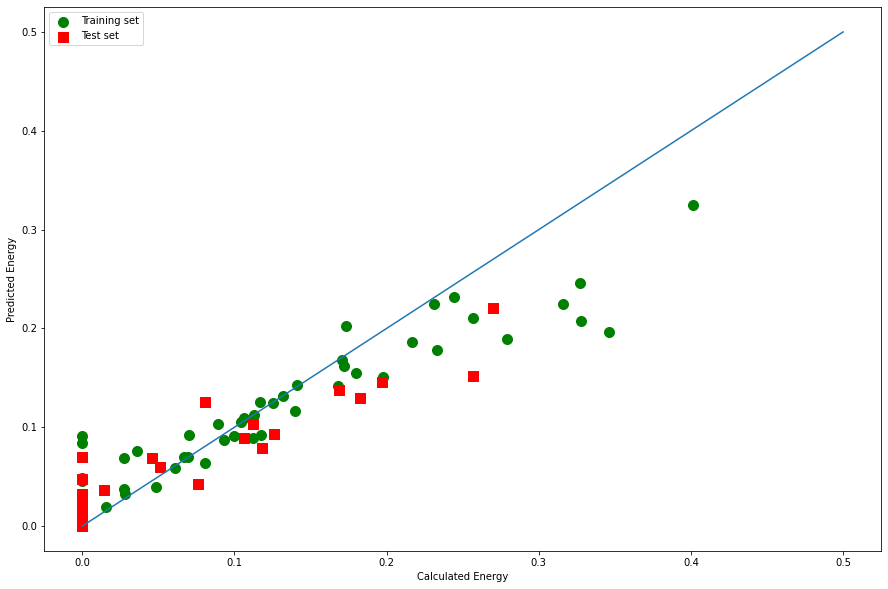

In [26]:
prediction_eg_test = rf_eg.predict(X_test_eg)
r_sq_eg_test = metrics.r2_score(y_test_eg,prediction_eg_test)

print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_test)))
print('Root mean squared error of test set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_test_eg,prediction_eg_test))))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_test))

plt.figure(figsize = (15,10))
plt.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([0,0.5],[0,0.5])
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

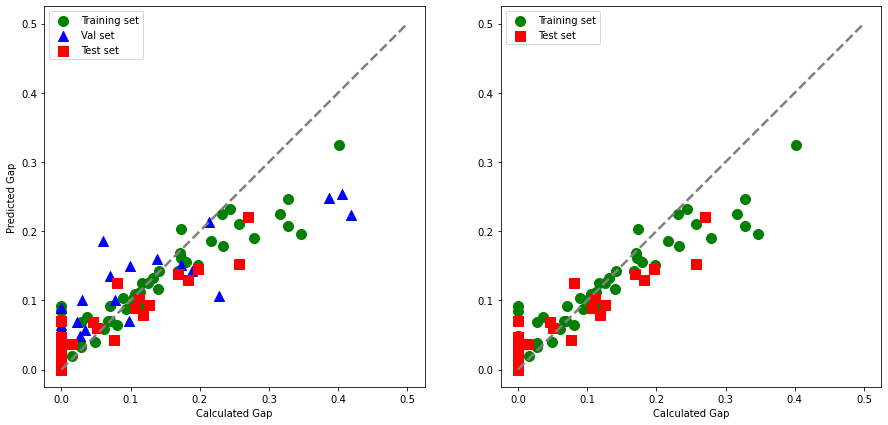

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
ax2.legend()
plt.show()

In [17]:
X_train_eg_pd = pd.DataFrame(X_train_eg)
X_val_eg_pd = pd.DataFrame(X_val_eg)
X_test_eg_pd = pd.DataFrame(X_test_eg)

y_train_eg_pd = pd.DataFrame(y_train_eg)
y_val_eg_pd = pd.DataFrame(y_val_eg)
y_test_eg_pd = pd.DataFrame(y_test_eg)

X_train_eg_pd.to_csv('Results_Eg/X_train_eg_RF.csv',index=False)
X_val_eg_pd.to_csv('Results_Eg/X_val_eg_RF.csv',index=False)
X_test_eg_pd.to_csv('Results_Eg/X_test_eg_RF.csv',index=False)

y_train_eg_pd.to_csv('Results_Eg/y_train_eg_RF.csv',index=False)
y_val_eg_pd.to_csv('Results_Eg/y_val_eg_RF.csv',index=False)
y_test_eg_pd.to_csv('Results_Eg/y_test_eg_RF.csv',index=False)

In [33]:
df.columns[26:]

Index(['avg_vdw_radius', 'delta_a1a2_vdw_radius', 'delta_bx_vdw_radius',
       'max_diff_vdw_radius', 'std_vdw_radius', 'avg_covalent_radius',
       'delta_a1a2_covalent_radius', 'delta_bx_covalent_radius',
       'max_diff_covalent_radius', 'std_covalent_radius', 'avg_atomic_radius',
       'delta_a1a2_atomic_radius', 'delta_bx_atomic_radius',
       'max_diff_atomic_radius', 'std_atomic_radius', 'avg_atomic_volume',
       'delta_a1a2_atomic_volume', 'delta_bx_atomic_volume',
       'max_diff_atomic_volume', 'std_atomic_volume',
       'avg_dipole_polarizability', 'delta_a1a2_dipole_polarizability',
       'delta_bx_dipole_polarizability', 'max_diff_dipole_polarizability',
       'std_dipole_polarizability', 'avg_val_electrons',
       'delta_a1a2_val_electrons', 'delta_bx_val_electrons',
       'max_diff_val_electrons', 'std_val_electrons', 'avg_unp_electrons',
       'delta_a1a2_unp_electrons', 'delta_bx_unp_electrons',
       'max_diff_unp_electrons', 'std_unp_electrons', 'avg_i

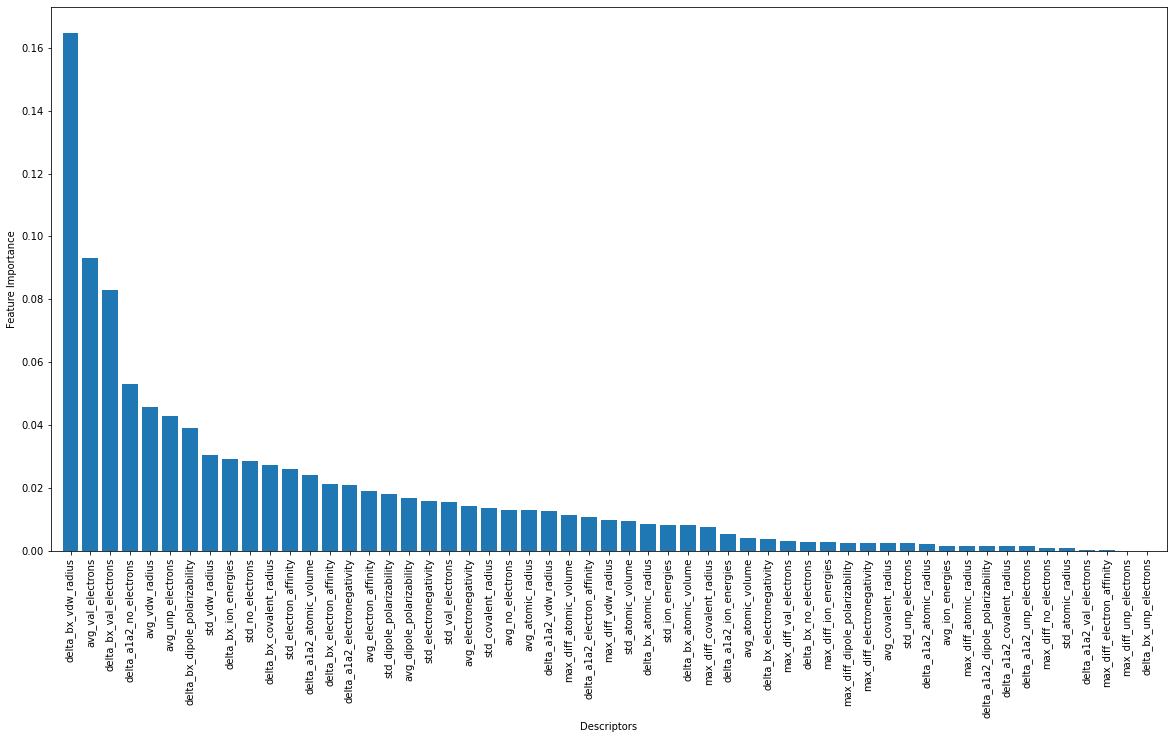

In [30]:
importances_eg = rf_eg.feature_importances_
indices_eg = np.argsort(importances_eg)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train_eg.shape[1]), importances_eg[indices_eg], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train_eg.shape[1]), desc_labels[indices_eg],  rotation=90)
plt.xlim([-1, X_train_eg.shape[1]])
plt.show()

In [68]:
desc_labels[indices_eg][32]

'max_diff_covalent_radius'

In [34]:
# Extract the features importance

data_feature_imp = {'feature': desc_labels[indices_eg],
                   'importance':importances_eg[indices_eg]}
pd_feature_imp = pd.DataFrame(data_feature_imp)
pd_feature_imp.to_csv('Results_Eg/feature_importance_eg_RF.csv',index=False)

In [35]:
desc_labels[indices_eg][:6]

Index(['delta_bx_vdw_radius', 'avg_val_electrons', 'delta_bx_val_electrons',
       'delta_a1a2_no_electrons', 'avg_vdw_radius', 'avg_unp_electrons'],
      dtype='object')

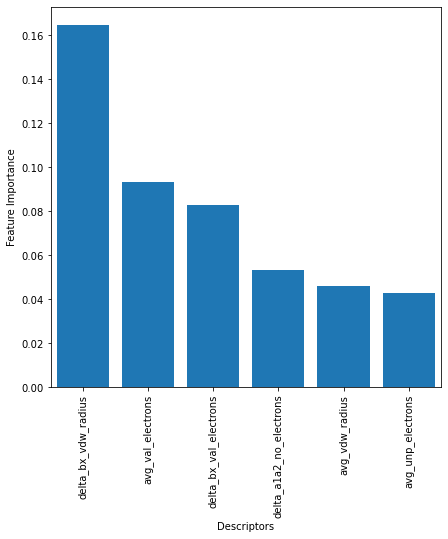

In [36]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(6), importances_eg[indices_eg][:6], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(6), desc_labels[indices_eg][:6],  rotation=90)
plt.xlim([-0.5, 5.5])
plt.show()

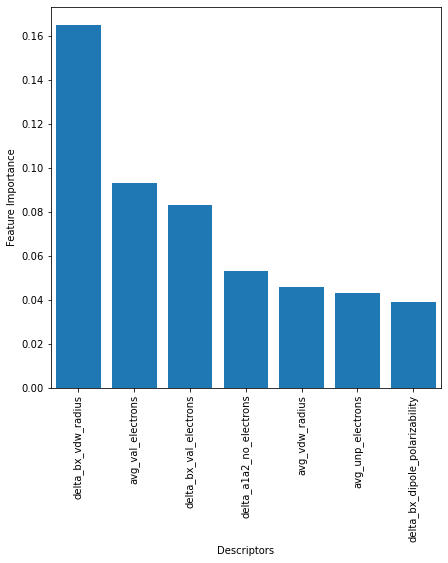

In [37]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(7), importances_eg[indices_eg][:7], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(7), desc_labels[indices_eg][:7],  rotation=90)
plt.xlim([-0.5, 6.5])
plt.show()

In [ ]:
## Scatter plots of top 15 descriptors

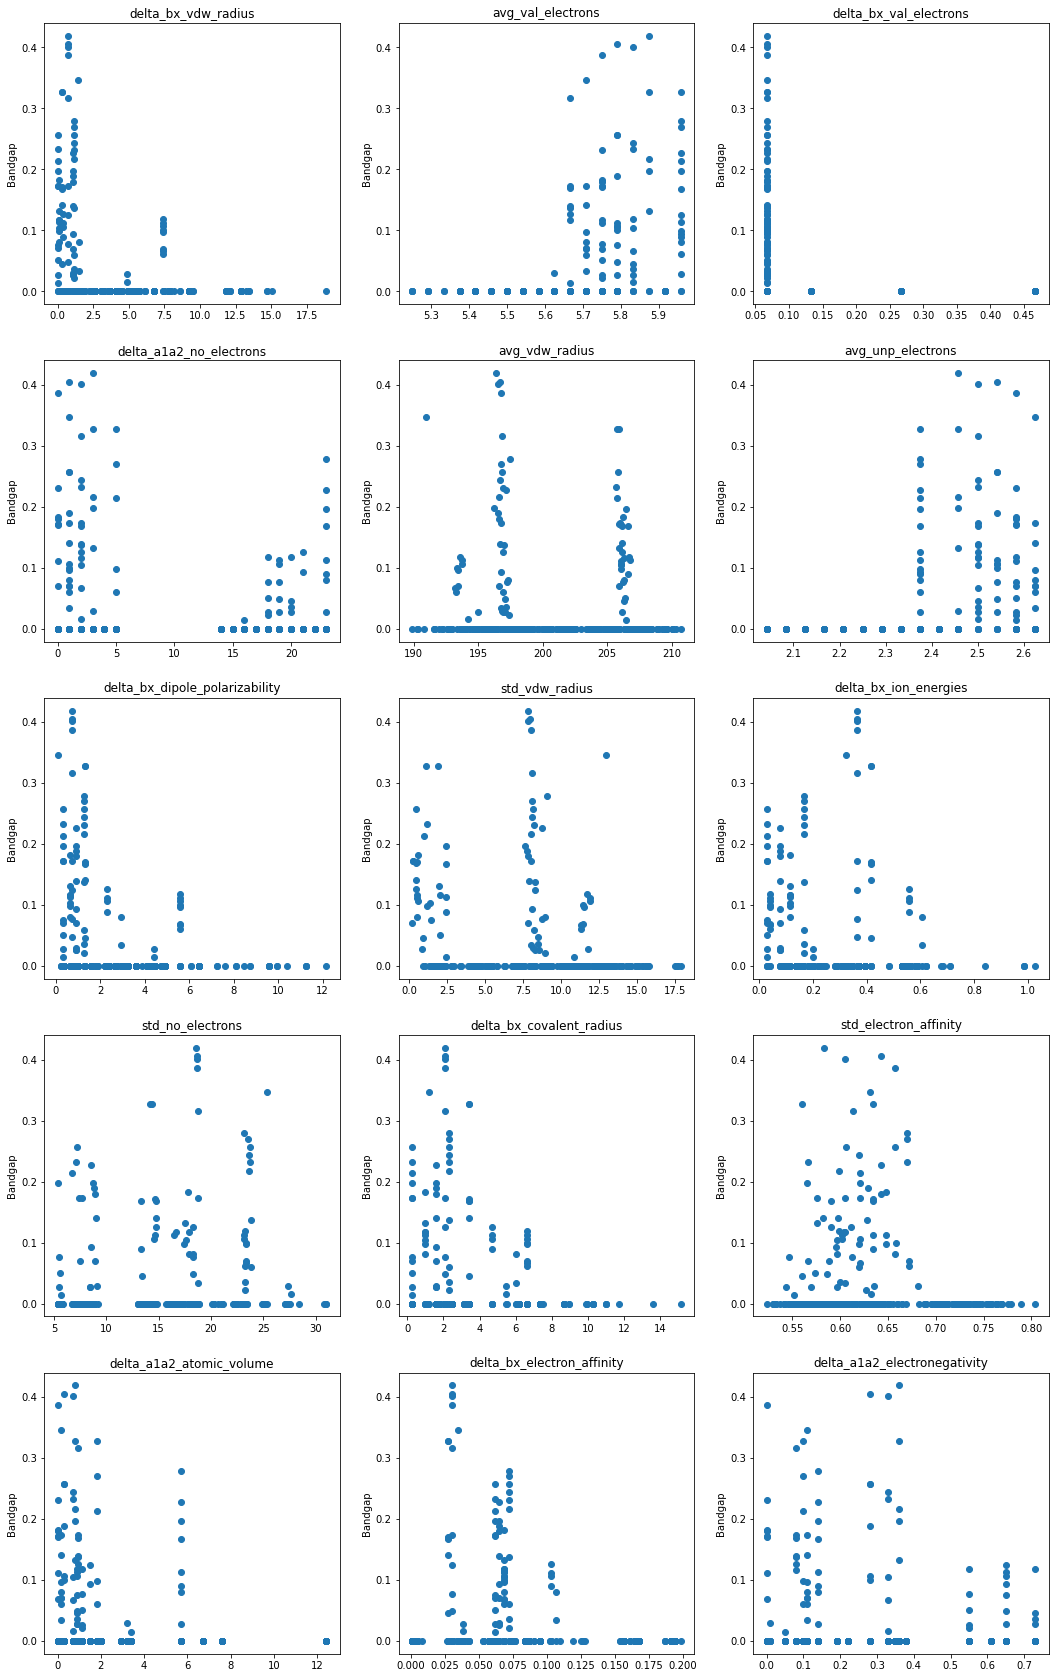

In [38]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (18, 30))

nrows = 5
ncols = 3
count = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax[i,j].scatter(df[desc_labels[indices_eg][count]],df['bandgap'])
        ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Bandgap'), ax[i,j].set_title(desc_labels[indices_eg][count])
        
        count = count+1

plt.show()

In [40]:
## With 7 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_15304/659128278.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best_7.fit(X_train_best_7, y_train_eg)


Mean absolute error of training set: 0.008
Mean absolute error of validation set: 0.021
Mean absolute error of test set: 0.012


R^2 score on training data: 0.923
R^2 score on validation data: 0.764
R^2 score on test data: 0.813


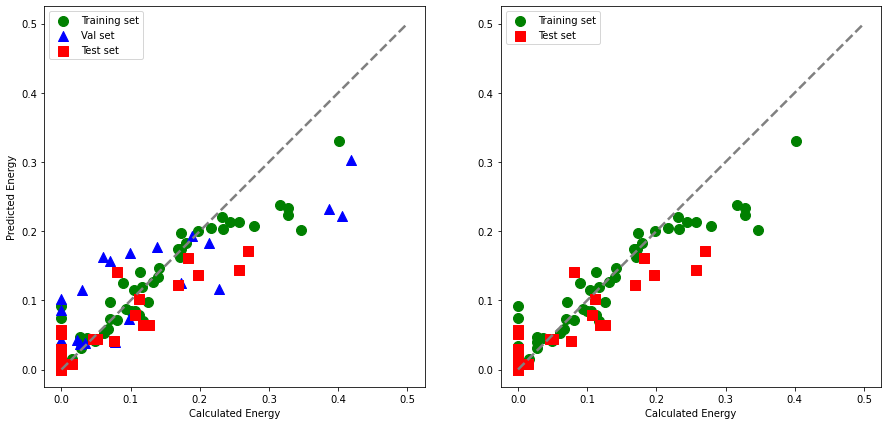

In [66]:
best_features_7 = desc_labels[indices_eg][:7]
best_indices_7 = [feature_list.index(i) for i in best_features_7]

# X_train_best_7 = X_train[X_train.columns[best_indices_7]]
# X_val_best_7 = X_val[X_val.columns[best_indices_7]]
# X_test_best_7 = X_test[X_test.columns[best_indices_7]]

X_train_best_7 = X_train_eg[:,best_indices_7]
X_val_best_7 = X_val_eg[:,best_indices_7]
X_test_best_7 = X_test_eg[:,best_indices_7]

rf_eg_best_7 = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_7.fit(X_train_best_7, y_train_eg)

prediction_eg_best_7_train = rf_eg_best_7.predict(X_train_best_7)
prediction_eg_best_7_val = rf_eg_best_7.predict(X_val_best_7)
prediction_eg_best_7_test = rf_eg_best_7.predict(X_test_best_7)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best_7_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best_7_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best_7_test)))
print('\n')

r_sq_eg_best_7_train = metrics.r2_score(y_train_eg,prediction_eg_best_7_train)
r_sq_eg_best_7_val = metrics.r2_score(y_val_eg,prediction_eg_best_7_val)
r_sq_eg_best_7_test = metrics.r2_score(y_test_eg,prediction_eg_best_7_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_7_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_7_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_7_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best_7_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best_7_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best_7_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best_7_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best_7_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [69]:
## With 13 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_15304/90271187.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best_13.fit(X_train_best_13, y_train_eg)


Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.024
Mean absolute error of test set: 0.013


R^2 score on training data: 0.907
R^2 score on validation data: 0.716
R^2 score on test data: 0.829


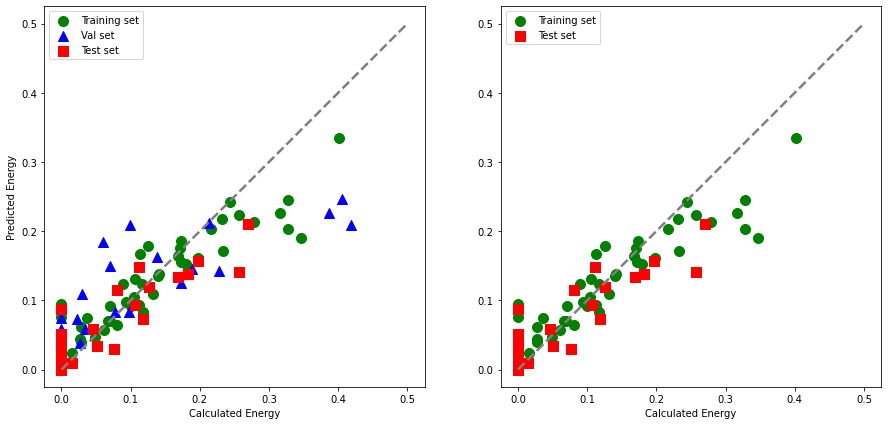

In [70]:
best_features_13 = desc_labels[indices_eg][:13]
best_indices_13 = [feature_list.index(i) for i in best_features_13]

# X_train_best_13 = X_train[X_train.columns[best_indices_13]]
# X_val_best_13 = X_val[X_val.columns[best_indices_13]]
# X_test_best_13 = X_test[X_test.columns[best_indices_13]]

X_train_best_13 = X_train_eg[:,best_indices_13]
X_val_best_13 = X_val_eg[:,best_indices_13]
X_test_best_13 = X_test_eg[:,best_indices_13]

rf_eg_best_13 = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_13.fit(X_train_best_13, y_train_eg)

prediction_eg_best_13_train = rf_eg_best_13.predict(X_train_best_13)
prediction_eg_best_13_val = rf_eg_best_13.predict(X_val_best_13)
prediction_eg_best_13_test = rf_eg_best_13.predict(X_test_best_13)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best_13_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best_13_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best_13_test)))
print('\n')

r_sq_eg_best_13_train = metrics.r2_score(y_train_eg,prediction_eg_best_13_train)
r_sq_eg_best_13_val = metrics.r2_score(y_val_eg,prediction_eg_best_13_val)
r_sq_eg_best_13_test = metrics.r2_score(y_test_eg,prediction_eg_best_13_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_13_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_13_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_13_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best_13_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best_13_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best_13_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best_13_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best_13_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [77]:
## With 32 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_15304/1193476520.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best_32.fit(X_train_best_32, y_train_eg)


Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.023
Mean absolute error of test set: 0.013


R^2 score on training data: 0.903
R^2 score on validation data: 0.737
R^2 score on test data: 0.855


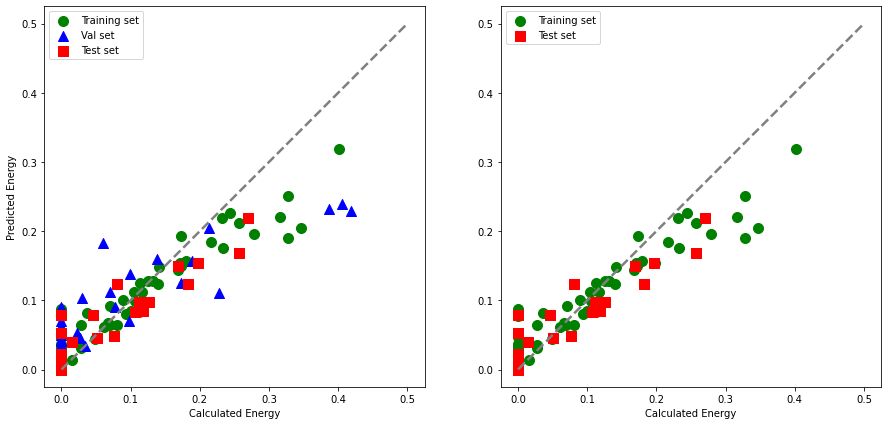

In [72]:
best_features_32 = desc_labels[indices_eg][:32]
best_indices_32 = [feature_list.index(i) for i in best_features_32]

# X_train_best_32 = X_train[X_train.columns[best_indices_32]]
# X_val_best_32 = X_val[X_val.columns[best_indices_32]]
# X_test_best_32 = X_test[X_test.columns[best_indices_32]]

X_train_best_32 = X_train_eg[:,best_indices_32]
X_val_best_32 = X_val_eg[:,best_indices_32]
X_test_best_32 = X_test_eg[:,best_indices_32]

rf_eg_best_32 = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_32.fit(X_train_best_32, y_train_eg)

prediction_eg_best_32_train = rf_eg_best_32.predict(X_train_best_32)
prediction_eg_best_32_val = rf_eg_best_32.predict(X_val_best_32)
prediction_eg_best_32_test = rf_eg_best_32.predict(X_test_best_32)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best_32_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best_32_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best_32_test)))
print('\n')

r_sq_eg_best_32_train = metrics.r2_score(y_train_eg,prediction_eg_best_32_train)
r_sq_eg_best_32_val = metrics.r2_score(y_val_eg,prediction_eg_best_32_val)
r_sq_eg_best_32_test = metrics.r2_score(y_test_eg,prediction_eg_best_32_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_32_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_32_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_32_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best_32_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best_32_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best_32_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best_32_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best_32_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [73]:
## Best 49 descriptors

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_15304/1893302635.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best_49.fit(X_train_best_49, y_train_eg)


Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.023
Mean absolute error of test set: 0.012


R^2 score on training data: 0.900
R^2 score on validation data: 0.746
R^2 score on test data: 0.851


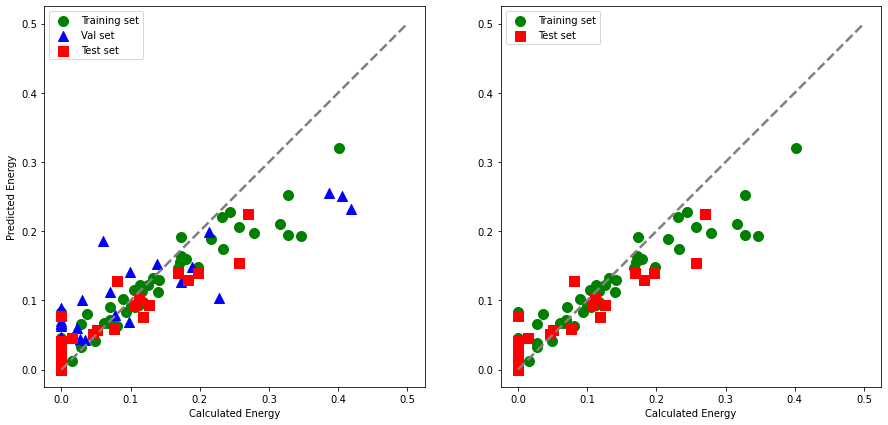

In [74]:
best_features_49 = desc_labels[indices_eg][:49]
best_indices_49 = [feature_list.index(i) for i in best_features_49]

# X_train_best_49 = X_train[X_train.columns[best_indices_49]]
# X_val_best_49 = X_val[X_val.columns[best_indices_49]]
# X_test_best_49 = X_test[X_test.columns[best_indices_49]]

X_train_best_49 = X_train_eg[:,best_indices_49]
X_val_best_49 = X_val_eg[:,best_indices_49]
X_test_best_49 = X_test_eg[:,best_indices_49]

rf_eg_best_49 = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_49.fit(X_train_best_49, y_train_eg)

prediction_eg_best_49_train = rf_eg_best_49.predict(X_train_best_49)
prediction_eg_best_49_val = rf_eg_best_49.predict(X_val_best_49)
prediction_eg_best_49_test = rf_eg_best_49.predict(X_test_best_49)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best_49_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best_49_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best_49_test)))
print('\n')

r_sq_eg_best_49_train = metrics.r2_score(y_train_eg,prediction_eg_best_49_train)
r_sq_eg_best_49_val = metrics.r2_score(y_val_eg,prediction_eg_best_49_val)
r_sq_eg_best_49_test = metrics.r2_score(y_test_eg,prediction_eg_best_49_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_49_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_49_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_49_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best_49_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best_49_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best_49_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best_49_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best_49_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

### Grid Search with Cross Validation - hyperparameter tuning

In [13]:
param_grid_eg = {'n_estimators': [10,20,30,50,70,100,120,150,200],
             'max_depth': [None,5,10,15,20,25,30,40,50],
             'max_features': [1,10,20,30,40,55],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,2,3,4,5,6],
             }

rf_eg_hp = RandomForestRegressor(random_state=41)
grid_search_eg_hp = GridSearchCV(estimator = rf_eg_hp, param_grid = param_grid_eg, 
                               scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, verbose = 2) ## 11

grid_search_eg_hp.fit(X_train_eg, y_train_eg)

rf_eg_hp = RandomForestRegressor(**grid_search_eg_hp.best_params_, random_state=41)
rf_eg_hp.fit(X_train_eg, y_train_eg)

Fitting 10 folds for each of 14580 candidates, totalling 145800 fits


C:\Users\Romakanta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/721216253.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_hp.fit(X_train_eg, y_train_eg)


RandomForestRegressor(max_features=55, min_samples_split=6, n_estimators=30,
                      random_state=41)

Mean absolute error of training set: 0.011
Mean absolute error of validation set: 0.026
Mean absolute error of test set: 0.014


R^2 score on training data: 0.865
R^2 score on validation data: 0.698
R^2 score on test data: 0.814


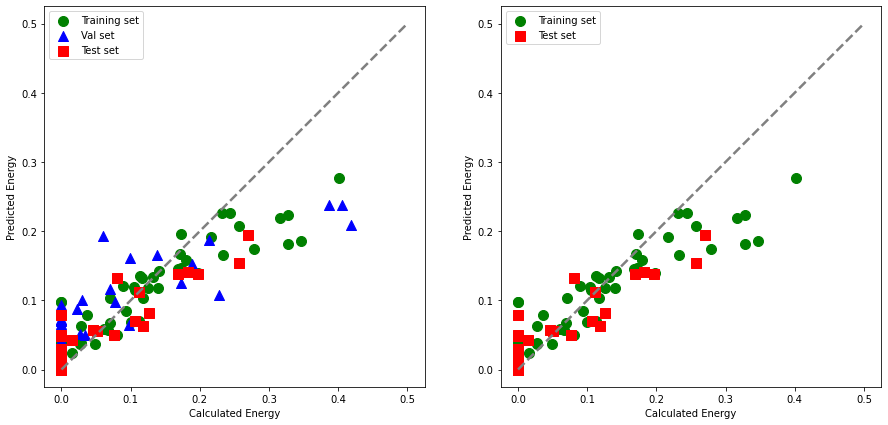

In [18]:
prediction_eg_hp_train = rf_eg_hp.predict(X_train_eg)
prediction_eg_hp_val = rf_eg_hp.predict(X_val_eg)
prediction_eg_hp_test = rf_eg_hp.predict(X_test_eg)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_hp_test)))
print('\n')

r2_eg_hp_train = metrics.r2_score(y_train_eg,prediction_eg_hp_train)
r2_eg_hp_val = metrics.r2_score(y_val_eg,prediction_eg_hp_val)
r2_eg_hp_test = metrics.r2_score(y_test_eg,prediction_eg_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r2_eg_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r2_eg_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r2_eg_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_hp_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax2.set_ylabel('Predicted Energy')
ax2.legend()
plt.show()

In [19]:
grid_search_eg_hp.best_params_
# {'max_depth': None,
#  'max_features': 55,
#  'min_samples_leaf': 1,
#  'min_samples_split': 6,
#  'n_estimators': 30}

{'max_depth': None,
 'max_features': 55,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 30}

In [20]:
# Export parameters

parameters_eg_hp_RF = {'max_depth': rf_eg_hp.max_depth,
                                 'max_features': rf_eg_hp.max_features,
                                 'min_samples_leaf': rf_eg_hp.min_samples_leaf,
                                 'min_samples_split': rf_eg_hp.min_samples_split,
                                 'n_estimators': rf_eg_hp.n_estimators,
                                 'train_R2': metrics.r2_score(y_train_eg,prediction_eg_hp_train),
                                 'val_R2': metrics.r2_score(y_val_eg,prediction_eg_hp_val),
                                 'test_R2': metrics.r2_score(y_test_eg,prediction_eg_hp_test),
                                 'train_MAE': metrics.mean_absolute_error(y_train_eg,prediction_eg_hp_train),
                                 'val_MAE': metrics.mean_absolute_error(y_val_eg,prediction_eg_hp_val),
                                 'test_MAE': metrics.mean_absolute_error(y_test_eg,prediction_eg_hp_test),
}

parameters_eg_hp_RF_pd = pd.DataFrame(parameters_eg_hp_RF,index=[0])
parameters_eg_hp_RF_pd.to_csv('Results_Eg/parameters_eg_hp_RF_pd.csv',index=False)

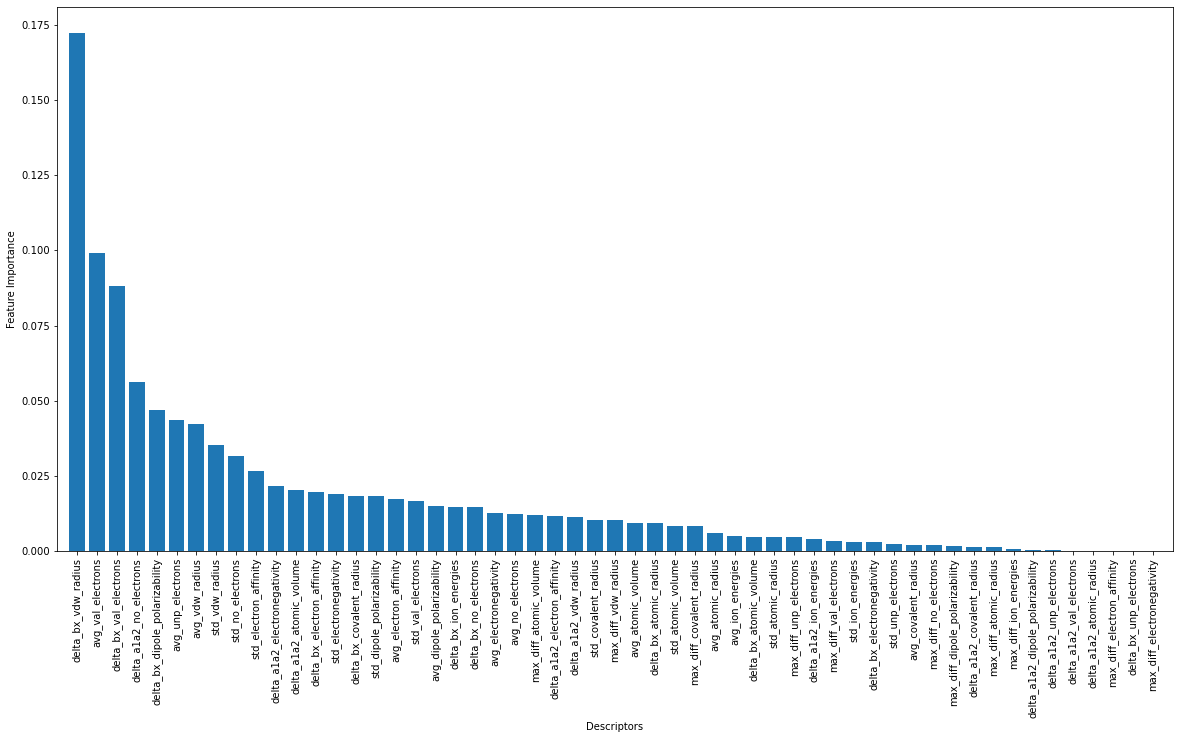

In [21]:
importances_eg_hp = rf_eg_hp.feature_importances_
indices_eg_hp = np.argsort(importances_eg_hp)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train_eg.shape[1]), importances_eg_hp[indices_eg_hp], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train_eg.shape[1]), desc_labels[indices_eg_hp],  rotation=90)
plt.xlim([-1, X_train_eg.shape[1]])
plt.show()

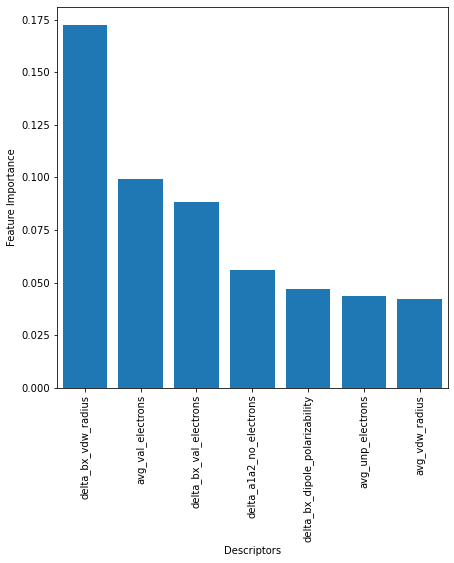

In [23]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(7), importances_eg_hp[indices_eg_hp][:7], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(7), desc_labels[indices_eg_hp][:7],  rotation=90)
plt.xlim([-0.5, 6.5])
plt.show()

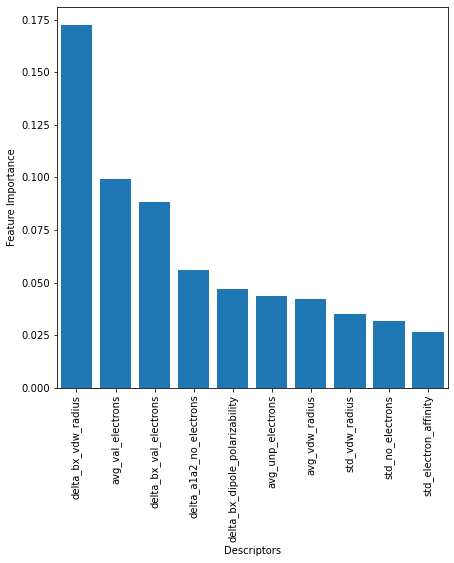

In [24]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(10), importances_eg_hp[indices_eg_hp][:10], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(10), desc_labels[indices_eg_hp][:10],  rotation=90)
plt.xlim([-0.5, 9.5])
plt.show()

In [25]:
# Extract the features importance

data_feature_imp_hp = {'feature': desc_labels[indices_eg_hp],
                   'importance':importances_eg_hp[indices_eg_hp]}
pd_feature_imp_hp = pd.DataFrame(data_feature_imp_hp)
pd_feature_imp_hp.to_csv('Results_Eg/feature_importance_eg_RF_hp.csv',index=False)

In [26]:
prediction_eg_train_pd_hp = pd.DataFrame(prediction_eg_hp_train)
prediction_eg_val_pd_hp = pd.DataFrame(prediction_eg_hp_val)
prediction_eg_test_pd_hp = pd.DataFrame(prediction_eg_hp_test)

prediction_eg_train_pd_hp.to_csv('Results_Eg/y_pred_train_eg_RF_hp.csv',index=False)
prediction_eg_val_pd_hp.to_csv('Results_Eg/y_pred_val_eg_RF_hp.csv',index=False)
prediction_eg_test_pd_hp.to_csv('Results_Eg/y_pred_test_eg_RF_hp.csv',index=False)

In [160]:
## scatter plots of top 6 descriptors

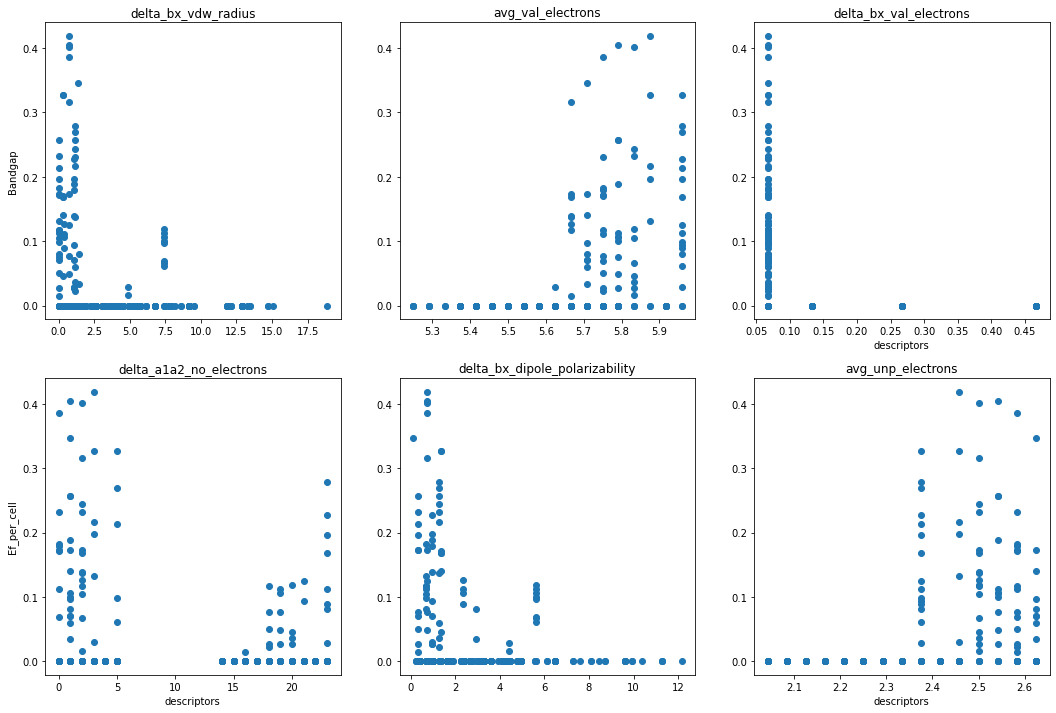

In [27]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(18,12))


ax1.scatter(df[desc_labels[indices_eg_hp][0]],df['bandgap'])
ax1.set_xlabel(''),ax1.set_ylabel('Bandgap'), ax1.set_title(desc_labels[indices_eg_hp][0])

ax2.scatter(df[desc_labels[indices_eg_hp][1]],df['bandgap'])
ax2.set_xlabel(''),ax2.set_ylabel(''), ax2.set_title(desc_labels[indices_eg_hp][1])

ax3.scatter(df[desc_labels[indices_eg_hp][2]],df['bandgap'])
ax3.set_xlabel('descriptors'),ax3.set_ylabel(''), ax3.set_title(desc_labels[indices_eg_hp][2])

ax4.scatter(df[desc_labels[indices_eg_hp][3]],df['bandgap'])
ax4.set_xlabel('descriptors'),ax4.set_ylabel('Ef_per_cell'), ax4.set_title(desc_labels[indices_eg_hp][3])

ax5.scatter(df[desc_labels[indices_eg_hp][4]],df['bandgap'])
ax5.set_xlabel(''),ax5.set_ylabel(''), ax5.set_title(desc_labels[indices_eg_hp][4])

ax6.scatter(df[desc_labels[indices_eg_hp][5]],df['bandgap'])
ax6.set_xlabel('descriptors'),ax6.set_ylabel(''), ax6.set_title(desc_labels[indices_eg_hp][5])

plt.show()

In [94]:
## Scatter plots of top 15 descriptors

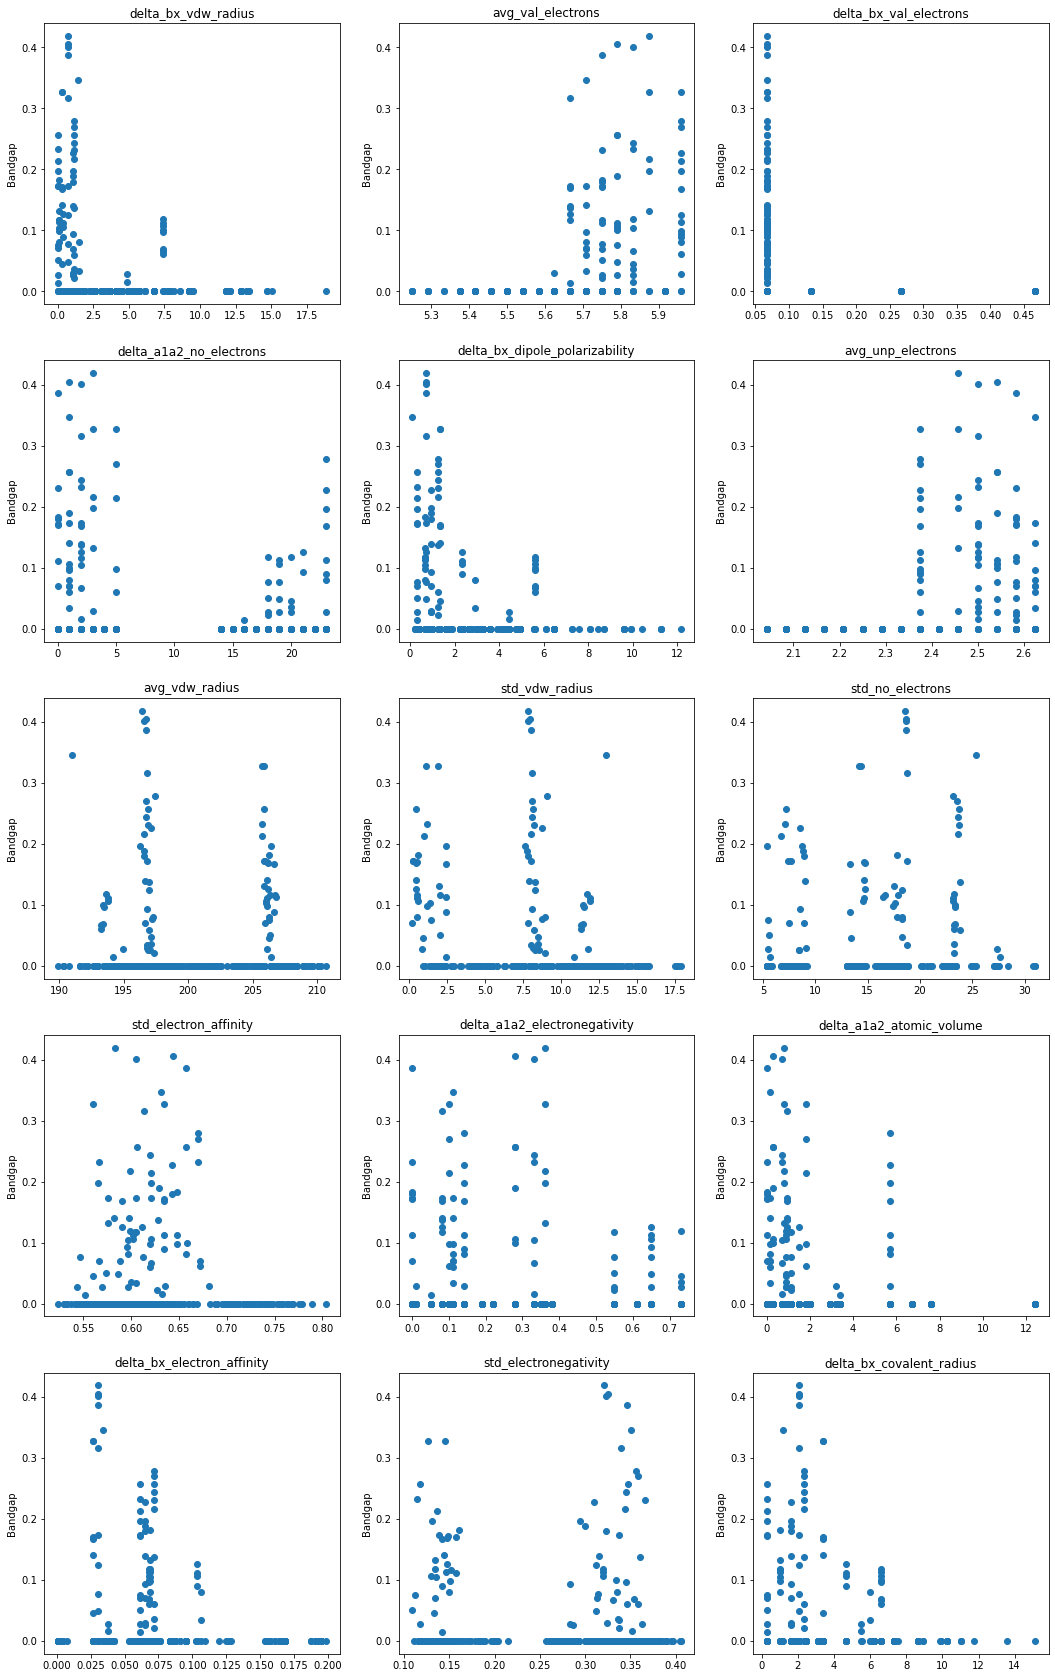

In [28]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (18, 30))

nrows = 5
ncols = 3
count = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax[i,j].scatter(df[desc_labels[indices_eg_hp][count]],df['bandgap'])
        ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Bandgap'), ax[i,j].set_title(desc_labels[indices_eg_hp][count])
        
        count = count+1

plt.show()

In [ ]:
## With 7 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/3041832714.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best7_hp.fit(X_train_best7_hp, y_train_eg)


Mean absolute error of training set: 0.010
Mean absolute error of validation set: 0.022
Mean absolute error of test set: 0.013


R^2 score on training data: 0.866
R^2 score on validation data: 0.755
R^2 score on test data: 0.811


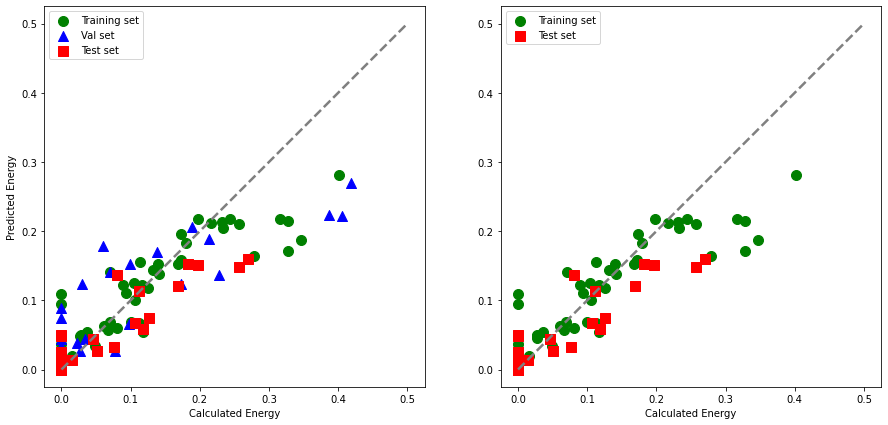

In [31]:
best_features7_hp = desc_labels[indices_eg_hp][:7]
best_indices7_hp = [feature_list.index(i) for i in best_features7_hp]

# X_train_best7_hp = X_train[X_train.columns[best_indices7_hp]]
# X_val_best7_hp = X_val[X_val.columns[best_indices7_hp]]
# X_test_best7_hp = X_test[X_test.columns[best_indices7_hp]]

X_train_best7_hp = X_train_eg[:,best_indices7_hp]
X_val_best7_hp = X_val_eg[:,best_indices7_hp]
X_test_best7_hp = X_test_eg[:,best_indices7_hp]

rf_eg_best7_hp = RandomForestRegressor(**grid_search_eg_hp.best_params_, random_state=41)
rf_eg_best7_hp.fit(X_train_best7_hp, y_train_eg)

prediction_eg_best7_hp_train = rf_eg_best7_hp.predict(X_train_best7_hp)
prediction_eg_best7_hp_val = rf_eg_best7_hp.predict(X_val_best7_hp)
prediction_eg_best7_hp_test = rf_eg_best7_hp.predict(X_test_best7_hp)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best7_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best7_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best7_hp_test)))
print('\n')

r_sq_eg_best7_hp_train = metrics.r2_score(y_train_eg,prediction_eg_best7_hp_train)
r_sq_eg_best7_hp_val = metrics.r2_score(y_val_eg,prediction_eg_best7_hp_val)
r_sq_eg_best7_hp_test = metrics.r2_score(y_test_eg,prediction_eg_best7_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best7_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best7_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best7_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best7_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best7_hp_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best7_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best7_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best7_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [ ]:
## With 10 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/271630965.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best10_hp.fit(X_train_best10_hp, y_train_eg)


Mean absolute error of training set: 0.010
Mean absolute error of validation set: 0.025
Mean absolute error of test set: 0.012


R^2 score on training data: 0.878
R^2 score on validation data: 0.691
R^2 score on test data: 0.850


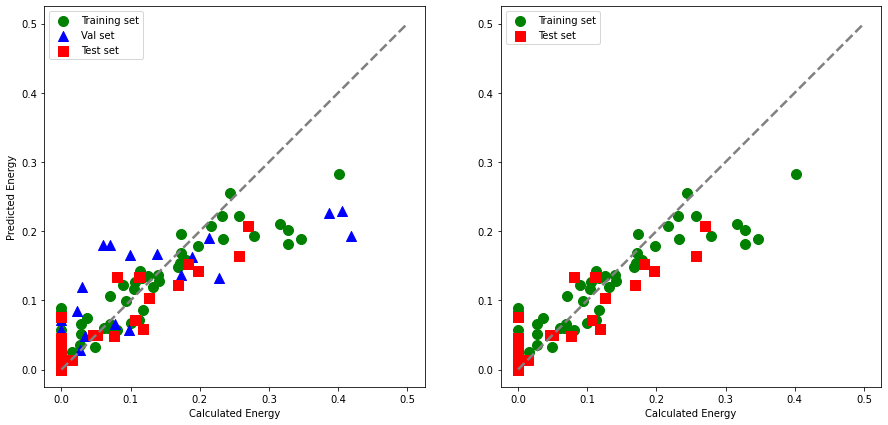

In [33]:
best_features10_hp = desc_labels[indices_eg_hp][:10]
best_indices10_hp = [feature_list.index(i) for i in best_features10_hp]

# X_train_best10_hp = X_train[X_train.columns[best_indices10_hp]]
# X_val_best10_hp = X_val[X_val.columns[best_indices10_hp]]
# X_test_best10_hp = X_test[X_test.columns[best_indices10_hp]]

X_train_best10_hp = X_train_eg[:,best_indices10_hp]
X_val_best10_hp = X_val_eg[:,best_indices10_hp]
X_test_best10_hp = X_test_eg[:,best_indices10_hp]

rf_eg_best10_hp = RandomForestRegressor(**grid_search_eg_hp.best_params_, random_state=41)
rf_eg_best10_hp.fit(X_train_best10_hp, y_train_eg)

prediction_eg_best10_hp_train = rf_eg_best10_hp.predict(X_train_best10_hp)
prediction_eg_best10_hp_val = rf_eg_best10_hp.predict(X_val_best10_hp)
prediction_eg_best10_hp_test = rf_eg_best10_hp.predict(X_test_best10_hp)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best10_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best10_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best10_hp_test)))
print('\n')

r_sq_eg_best10_hp_train = metrics.r2_score(y_train_eg,prediction_eg_best10_hp_train)
r_sq_eg_best10_hp_val = metrics.r2_score(y_val_eg,prediction_eg_best10_hp_val)
r_sq_eg_best10_hp_test = metrics.r2_score(y_test_eg,prediction_eg_best10_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best10_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best10_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best10_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best10_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best10_hp_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best10_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best10_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best10_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [34]:
## With 32 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/2737722245.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best32_hp.fit(X_train_best32_hp, y_train_eg)


Mean absolute error of training set: 0.011
Mean absolute error of validation set: 0.025
Mean absolute error of test set: 0.014


R^2 score on training data: 0.863
R^2 score on validation data: 0.705
R^2 score on test data: 0.821


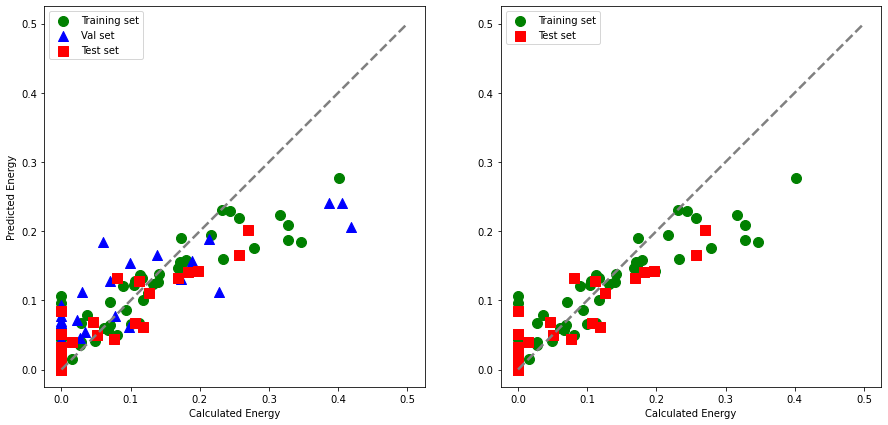

In [35]:
best_features32_hp = desc_labels[indices_eg_hp][:32]
best_indices32_hp = [feature_list.index(i) for i in best_features32_hp]

# X_train_best32_hp = X_train[X_train.columns[best_indices32_hp]]
# X_val_best32_hp = X_val[X_val.columns[best_indices32_hp]]
# X_test_best32_hp = X_test[X_test.columns[best_indices32_hp]]

X_train_best32_hp = X_train_eg[:,best_indices32_hp]
X_val_best32_hp = X_val_eg[:,best_indices32_hp]
X_test_best32_hp = X_test_eg[:,best_indices32_hp]

rf_eg_best32_hp = RandomForestRegressor(**grid_search_eg_hp.best_params_, random_state=41)
rf_eg_best32_hp.fit(X_train_best32_hp, y_train_eg)

prediction_eg_best32_hp_train = rf_eg_best32_hp.predict(X_train_best32_hp)
prediction_eg_best32_hp_val = rf_eg_best32_hp.predict(X_val_best32_hp)
prediction_eg_best32_hp_test = rf_eg_best32_hp.predict(X_test_best32_hp)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best32_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best32_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best32_hp_test)))
print('\n')

r_sq_eg_best32_hp_train = metrics.r2_score(y_train_eg,prediction_eg_best32_hp_train)
r_sq_eg_best32_hp_val = metrics.r2_score(y_val_eg,prediction_eg_best32_hp_val)
r_sq_eg_best32_hp_test = metrics.r2_score(y_test_eg,prediction_eg_best32_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best32_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best32_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best32_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best32_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best32_hp_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best32_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best32_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best32_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [ ]:
## With 47 best features

C:\Users\ROMAKA~1\AppData\Local\Temp/ipykernel_29100/3480590798.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_eg_best47_hp.fit(X_train_best47_hp, y_train_eg)


Mean absolute error of training set: 0.011
Mean absolute error of validation set: 0.025
Mean absolute error of test set: 0.013


R^2 score on training data: 0.866
R^2 score on validation data: 0.692
R^2 score on test data: 0.837


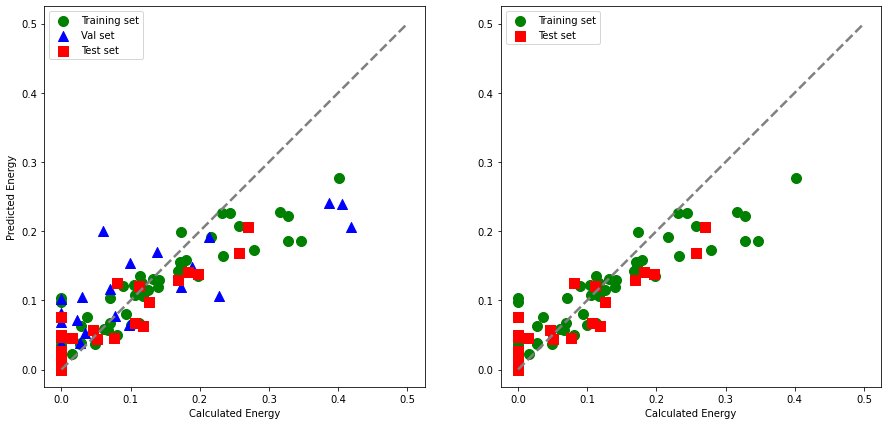

In [36]:
best_features47_hp = desc_labels[indices_eg_hp][:47]
best_indices47_hp = [feature_list.index(i) for i in best_features47_hp]

# X_train_best47_hp = X_train[X_train.columns[best_indices47_hp]]
# X_val_best47_hp = X_val[X_val.columns[best_indices47_hp]]
# X_test_best47_hp = X_test[X_test.columns[best_indices47_hp]]

X_train_best47_hp = X_train_eg[:,best_indices47_hp]
X_val_best47_hp = X_val_eg[:,best_indices47_hp]
X_test_best47_hp = X_test_eg[:,best_indices47_hp]

rf_eg_best47_hp = RandomForestRegressor(**grid_search_eg_hp.best_params_, random_state=41)
rf_eg_best47_hp.fit(X_train_best47_hp, y_train_eg)

prediction_eg_best47_hp_train = rf_eg_best47_hp.predict(X_train_best47_hp)
prediction_eg_best47_hp_val = rf_eg_best47_hp.predict(X_val_best47_hp)
prediction_eg_best47_hp_test = rf_eg_best47_hp.predict(X_test_best47_hp)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best47_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best47_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best47_hp_test)))
print('\n')

r_sq_eg_best47_hp_train = metrics.r2_score(y_train_eg,prediction_eg_best47_hp_train)
r_sq_eg_best47_hp_val = metrics.r2_score(y_val_eg,prediction_eg_best47_hp_val)
r_sq_eg_best47_hp_test = metrics.r2_score(y_test_eg,prediction_eg_best47_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best47_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best47_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best47_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_eg,prediction_eg_best47_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best47_hp_val ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best47_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best47_hp_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best47_hp_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [10]:
## Performance of RF model with the training size 

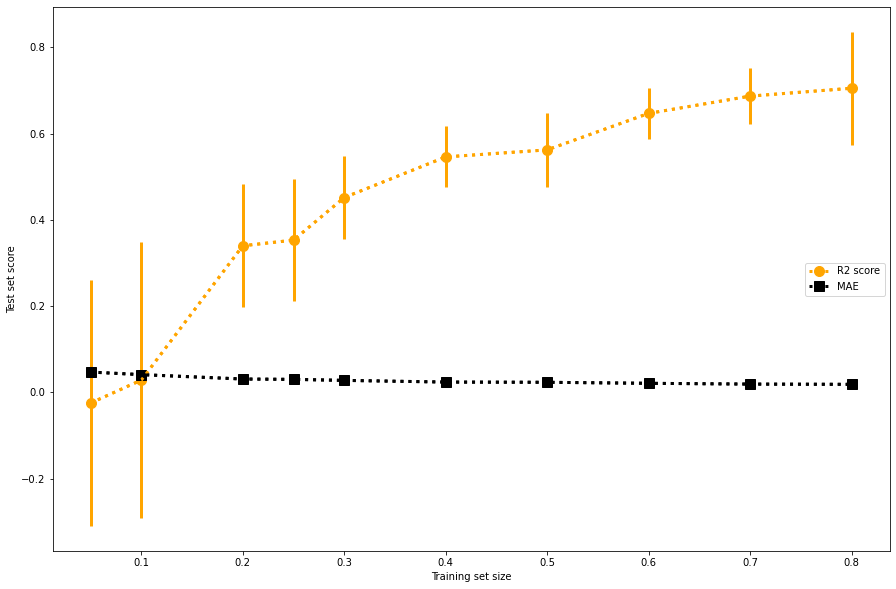

In [37]:
final_training_R2_scores = []
final_test_R2_scores = []
final_training_MAE_scores = []
final_test_MAE_scores = []

split_ratio = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8]
for i in range(len(split_ratio)):
    intermediate_training_R2_scores =[]
    intermediate_test_R2_scores = []
    intermediate_training_MAE_scores = []
    intermediate_test_MAE_scores = []
    
    for j in range(30):
        X_train_eg,X_test_eg,y_train_eg,y_test_eg= train_test_split(X_eg, y_eg, test_size=1-split_ratio[i])
        
        rf_eg= RandomForestRegressor(n_estimators = 30, random_state=41)
        rf_eg.fit(X_train_eg, y_train_eg.ravel())
        
        prediction_eg_train= rf_eg.predict(X_train_eg)
        prediction_eg_test= rf_eg.predict(X_test_eg)
        
        r_sq_eg_train= metrics.r2_score(y_train_eg,prediction_eg_train)
        r_sq_eg_test= metrics.r2_score(y_test_eg,prediction_eg_test)
        
        mae_eg_train= metrics.mean_absolute_error(y_train_eg,prediction_eg_train)
        mae_eg_test= metrics.mean_absolute_error(y_test_eg,prediction_eg_test)
        
        intermediate_training_R2_scores.append(r_sq_eg_train)
        intermediate_test_R2_scores.append(r_sq_eg_test)
        
        intermediate_training_MAE_scores.append(mae_eg_train)
        intermediate_test_MAE_scores.append(mae_eg_test)
    
    final_training_R2_scores.append(intermediate_training_R2_scores)
    final_test_R2_scores.append(intermediate_test_R2_scores)  
    
    final_training_MAE_scores.append(intermediate_training_MAE_scores)
    final_test_MAE_scores.append(intermediate_test_MAE_scores)
    
# final_train_scores, final_test_scores
avg_training_R2_score = []
std_training_R2_score = []
avg_training_MAE_score = []
std_training_MAE_score = []

avg_test_R2_score = []
std_test_R2_score = []
avg_test_MAE_score = []
std_test_MAE_score = []

for i in range(len(final_training_R2_scores)):
    avg_training_R2_score.append(mean(final_training_R2_scores[i]))
    avg_test_R2_score.append(mean(final_test_R2_scores[i]))
    
    std_training_R2_score.append(std(final_training_R2_scores[i]))
    std_test_R2_score.append(std(final_test_R2_scores[i]))
    
    avg_training_MAE_score.append(mean(final_training_MAE_scores[i]))
    avg_test_MAE_score.append(mean(final_test_MAE_scores[i]))
    
    std_training_MAE_score.append(std(final_training_MAE_scores[i]))
    std_test_MAE_score.append(std(final_test_MAE_scores[i]))
    
# Plot
plt.figure(figsize=(15,10))
plot(split_ratio, avg_test_R2_score, linewidth= 3, color='orange', marker = 'o', linestyle='dotted', label = 'R2 score', markersize=10)
errorbar(split_ratio, avg_test_R2_score, linewidth= 3, color='orange', yerr = std_test_R2_score, linestyle='dotted')
plot(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', marker='s', linestyle='dotted', label = 'MAE', markersize=10)
errorbar(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', yerr = std_test_MAE_score, linestyle='dotted')

plt.xlabel('Training set size')
plt.ylabel('Test set score')
plt.legend(loc='center right')
plt.show()

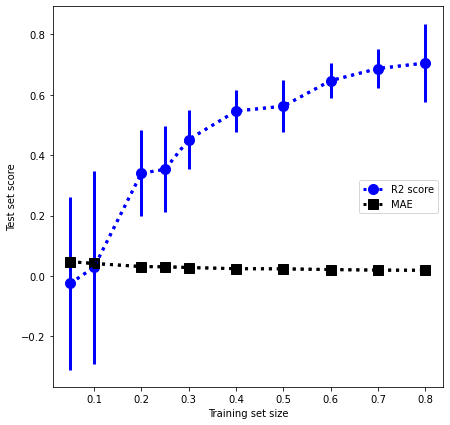

In [39]:
# Plot
plt.figure(figsize=(7,7))
plot(split_ratio, avg_test_R2_score, linewidth= 3, color='blue', marker = 'o', linestyle='dotted', label = 'R2 score', markersize=10)
errorbar(split_ratio, avg_test_R2_score, linewidth= 3, color='blue', yerr = std_test_R2_score, linestyle='dotted')
plot(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', marker='s', linestyle='dotted', label = 'MAE', markersize=10)
errorbar(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', yerr = std_test_MAE_score, linestyle='dotted')
plt.xlabel('Training set size')
plt.ylabel('Test set score')
plt.legend(loc='center right')
plt.show()

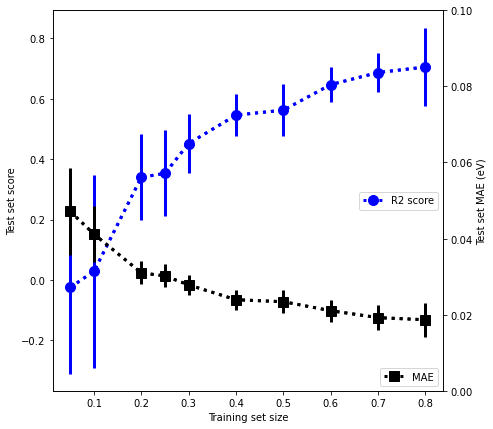

In [56]:
# fig, ax1 = plt.subplots(figsize=(7, 7))

# # Instantiate a second axes that shares the same x-axis
# ax2 = ax1.twinx()  
# ax2.set_ylim(4, 20)

# plt.show()


# Plot
fig, ax1 = plt.subplots(figsize=(7,7))
ax2 = ax1.twinx()
ax1.plot(split_ratio, avg_test_R2_score, linewidth= 3, color='blue', marker = 'o', linestyle='dotted', label = 'R2 score', markersize=10)
ax1.errorbar(split_ratio, avg_test_R2_score, linewidth= 3, color='blue', yerr = std_test_R2_score, linestyle='dotted')
ax2.plot(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', marker='s', linestyle='dotted', label = 'MAE', markersize=10)
ax2.errorbar(split_ratio, avg_test_MAE_score, linewidth= 3, color='black', yerr = std_test_MAE_score, linestyle='dotted')
ax2.set_ylim(0, 0.1)
ax1.set_xlabel('Training set size')
ax1.set_ylabel('Test set score')
ax2.set_ylabel('Test set MAE (eV)')
ax1.legend(loc='center right')
ax2.legend(loc='lower right')
plt.show()

In [40]:
#Export the result

training_set_size_pd = pd.DataFrame({'split_ratio': split_ratio,
                                     'avg_train_R2_score': avg_training_R2_score,
                                     'avg_test_R2_score': avg_test_R2_score,
                                     'avg_train_MAE_score': avg_training_MAE_score,
                                     'avg_test_MAE_score': avg_test_MAE_score,
                                     
                                     'std_train_R2_score': std_training_R2_score,
                                     'std_test_R2_score': std_test_R2_score,
                                     'std_train_MAE_score': std_training_MAE_score,
                                     'std_test_MAE_score': std_test_MAE_score,
                                    })
training_set_size_pd.to_csv('Results_Eg/training_set_size_RF_eg.csv',index=False)

In [36]:
## Data from FFNN model

In [15]:
X_train_dnn = pd.read_csv('Results_Eg/X_train_ffnn.csv')
X_val_dnn = pd.read_csv('Results_Eg/X_val_ffnn.csv')
X_test_dnn = pd.read_csv('Results_Eg/X_test_ffnn.csv')

y_train_dnn = pd.read_csv('Results_Eg/y_train_ffnn.csv')
y_val_dnn = pd.read_csv('Results_Eg/y_val_ffnn.csv')
y_test_dnn = pd.read_csv('Results_Eg/y_test_ffnn.csv')

In [16]:
y_train_dnn_eg = y_train_dnn['57']
y_val_dnn_eg = y_val_dnn['57']
y_test_dnn_eg = y_test_dnn['57']

Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.016
Mean absolute error of test set: 0.011


R^2 score on training data: 0.921
R^2 score on validation data: 0.835
R^2 score on test data: 0.750




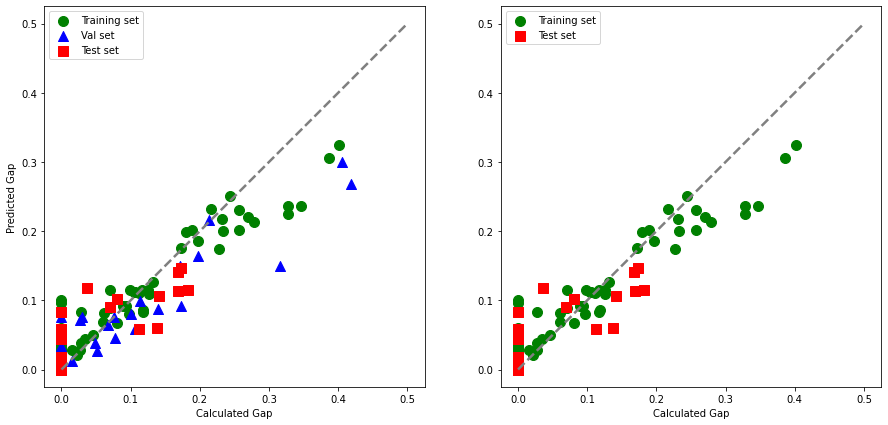

In [12]:
rf_eg_dnn = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_dnn.fit(X_train_dnn, y_train_dnn_eg)

prediction_eg_train_dnn = rf_eg_dnn.predict(X_train_dnn)
prediction_eg_val_dnn = rf_eg_dnn.predict(X_val_dnn)
prediction_eg_test_dnn = rf_eg_dnn.predict(X_test_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_test_dnn)))
print('\n')
r_sq_eg_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_train_dnn)
r_sq_eg_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_val_dnn)
r_sq_eg_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_test_dnn))
print('\n')

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_dnn_eg,prediction_eg_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
ax2.legend()
plt.show()

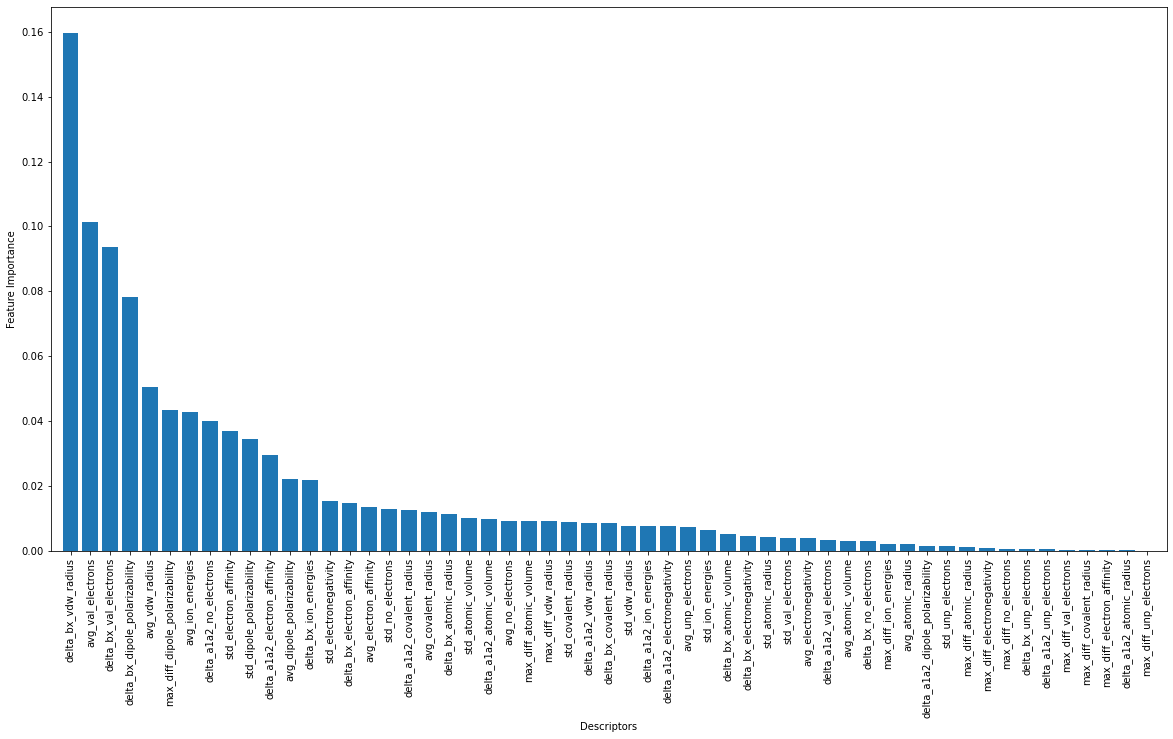

In [20]:
importances_eg_dnn = rf_eg_dnn.feature_importances_
indices_eg_dnn = np.argsort(importances_eg_dnn)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train_dnn.shape[1]), importances_eg_dnn[indices_eg_dnn], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train_dnn.shape[1]), desc_labels[indices_eg_dnn],  rotation=90)
plt.xlim([-1, X_train_dnn.shape[1]])
plt.show()

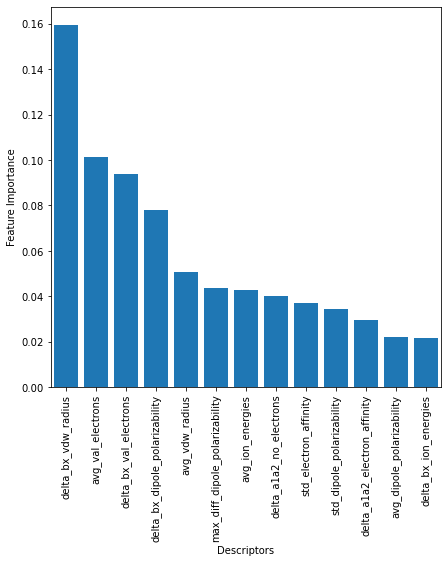

In [23]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(13), importances_eg_dnn[indices_eg_dnn][:13], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(13), desc_labels[indices_eg_dnn][:13],  rotation=90)
plt.xlim([-0.5, 12.5])
plt.show()

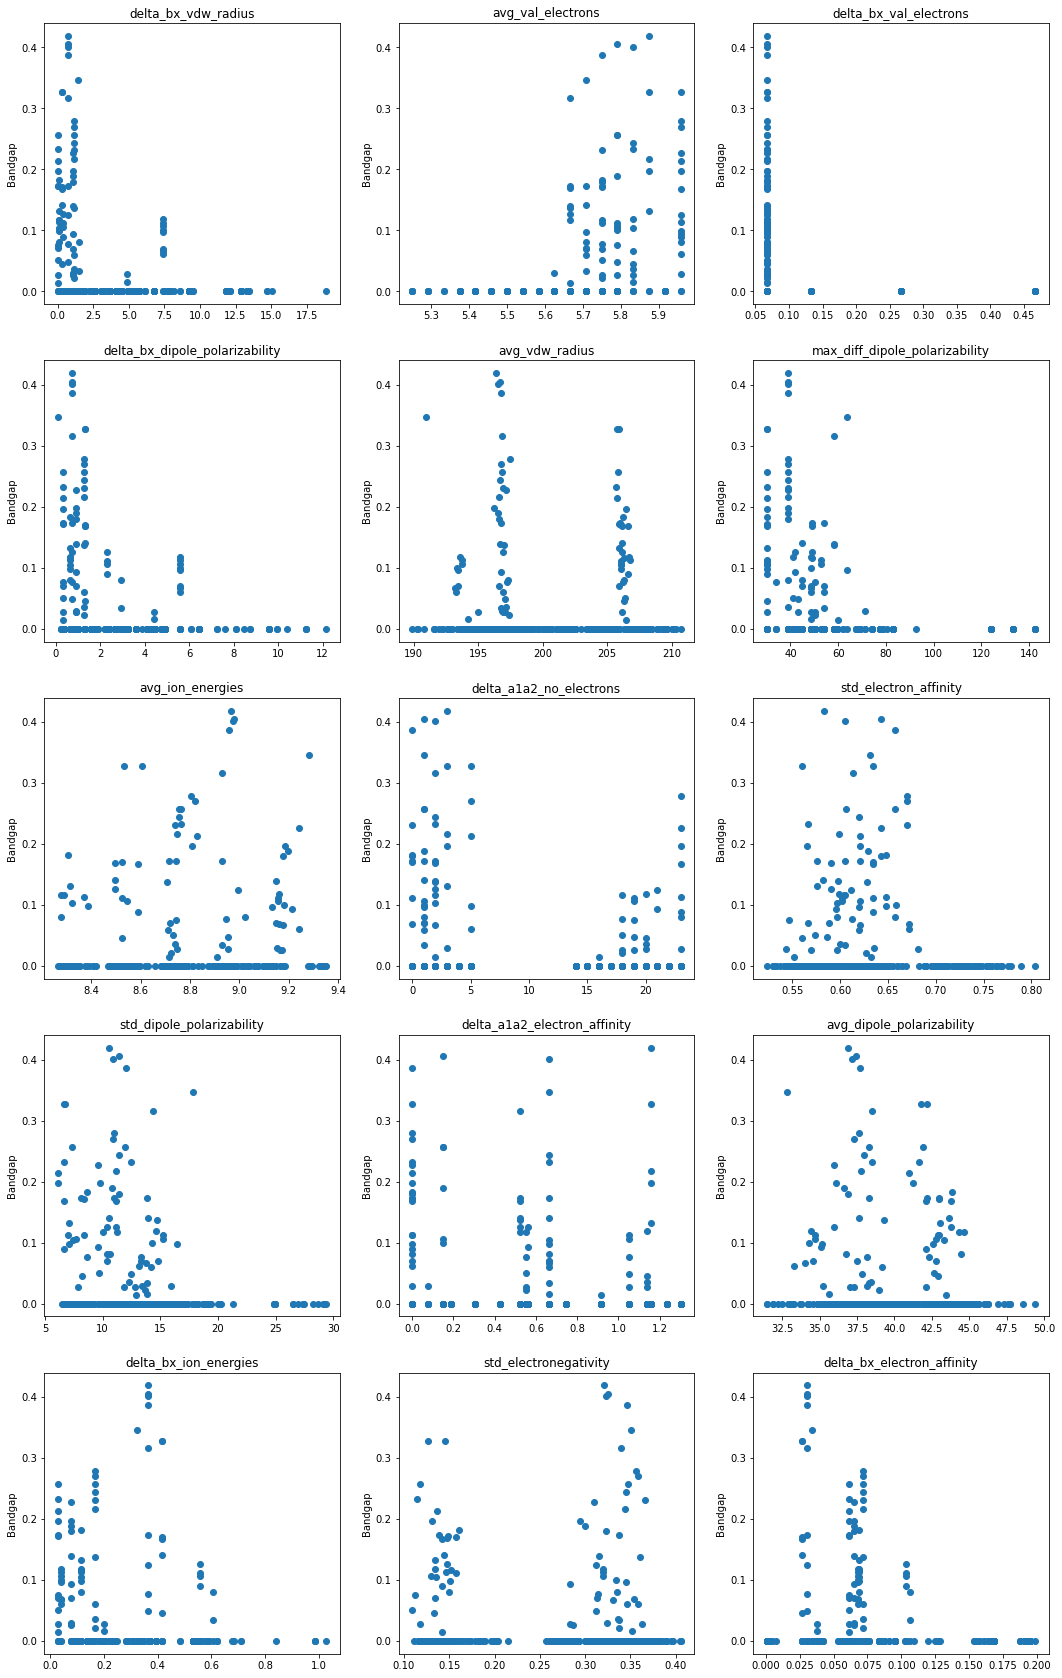

In [24]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (18, 30))

nrows = 5
ncols = 3
count = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax[i,j].scatter(df[desc_labels[indices_eg_dnn][count]],df['bandgap'])
        ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Bandgap'), ax[i,j].set_title(desc_labels[indices_eg_dnn][count])
        
        count = count+1

plt.show()

In [25]:
## Best 4 features

Mean absolute error of training set: 0.012
Mean absolute error of validation set: 0.030
Mean absolute error of test set: 0.021


R^2 score on training data: 0.870
R^2 score on validation data: 0.448
R^2 score on test data: -0.023


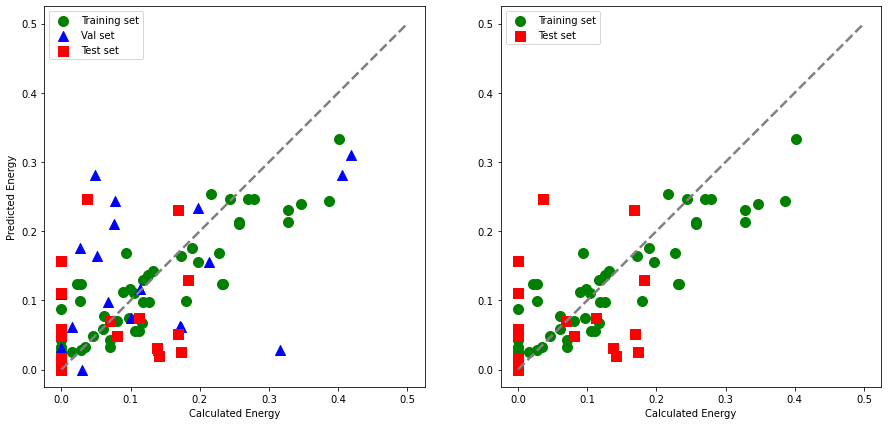

In [47]:
best_features_4_dnn = desc_labels[indices_eg_dnn][:4]
best_indices_4_dnn = [feature_list.index(i) for i in best_features_4_dnn]

X_train_best_4_dnn = X_train_dnn[X_train_dnn.columns[best_indices_4_dnn]]
X_val_best_4_dnn = X_val_dnn[X_val_dnn.columns[best_indices_4_dnn]]
X_test_best_4_dnn = X_test_dnn[X_test_dnn.columns[best_indices_4_dnn]]

rf_eg_best_4_dnn = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_4_dnn.fit(X_train_best_4_dnn, y_train_dnn_eg)

prediction_eg_best_4_train_dnn = rf_eg_best_4_dnn.predict(X_train_best_4_dnn)
prediction_eg_best_4_val_dnn = rf_eg_best_4_dnn.predict(X_val_best_4_dnn)
prediction_eg_best_4_test_dnn = rf_eg_best_4_dnn.predict(X_test_best_4_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_best_4_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_best_4_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_best_4_test_dnn)))
print('\n')

r_sq_eg_best_4_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_best_4_train_dnn)
r_sq_eg_best_4_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_best_4_val_dnn)
r_sq_eg_best_4_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_best_4_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_4_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_4_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_4_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_dnn_eg,prediction_eg_best_4_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_best_4_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_best_4_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_best_4_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_best_4_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [ ]:
## Best 13 features

Mean absolute error of training set: 0.009
Mean absolute error of validation set: 0.019
Mean absolute error of test set: 0.012


R^2 score on training data: 0.924
R^2 score on validation data: 0.805
R^2 score on test data: 0.703


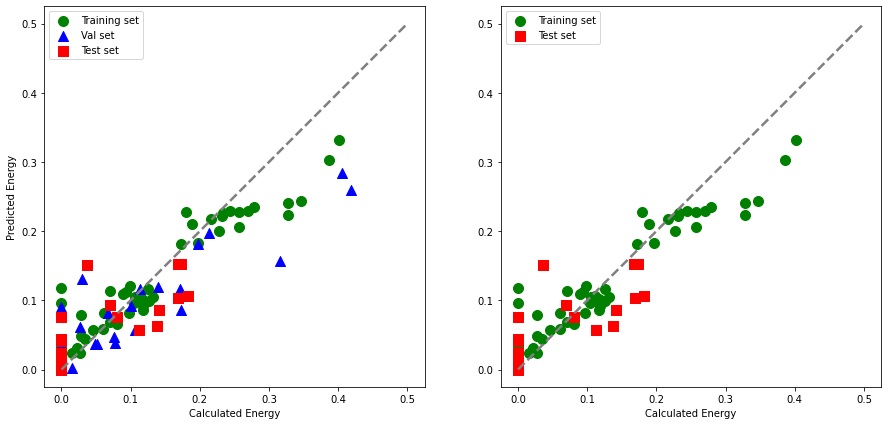

In [48]:
best_features_13_dnn = desc_labels[indices_eg_dnn][:13]
best_indices_13_dnn = [feature_list.index(i) for i in best_features_13_dnn]

X_train_best_13_dnn = X_train_dnn[X_train_dnn.columns[best_indices_13_dnn]]
X_val_best_13_dnn = X_val_dnn[X_val_dnn.columns[best_indices_13_dnn]]
X_test_best_13_dnn = X_test_dnn[X_test_dnn.columns[best_indices_13_dnn]]

rf_eg_best_13_dnn = RandomForestRegressor(n_estimators = 30, random_state=41)
rf_eg_best_13_dnn.fit(X_train_best_13_dnn, y_train_dnn_eg)

prediction_eg_best_13_train_dnn = rf_eg_best_13_dnn.predict(X_train_best_13_dnn)
prediction_eg_best_13_val_dnn = rf_eg_best_13_dnn.predict(X_val_best_13_dnn)
prediction_eg_best_13_test_dnn = rf_eg_best_13_dnn.predict(X_test_best_13_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_best_13_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_best_13_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_best_13_test_dnn)))
print('\n')

r_sq_eg_best_13_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_best_13_train_dnn)
r_sq_eg_best_13_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_best_13_val_dnn)
r_sq_eg_best_13_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_best_13_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best_13_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best_13_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best_13_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_dnn_eg,prediction_eg_best_13_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_best_13_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_best_13_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_best_13_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_best_13_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [49]:
param_grid_eg_dnn = {'n_estimators': [10,20,30,50,70,100,120,150,200],
             'max_depth': [None,5,10,15,20,25,30,40,50],
             'max_features': [1,10,20,30,40,55],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,2,3,4,5,6],
             }

rf_eg_hp_dnn = RandomForestRegressor(random_state=41)
grid_search_eg_hp_dnn = GridSearchCV(estimator = rf_eg_hp_dnn, param_grid = param_grid_eg_dnn, 
                               scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, verbose = 2) ## 11

grid_search_eg_hp_dnn.fit(X_train_dnn, y_train_dnn_eg)

rf_eg_hp_dnn = RandomForestRegressor(**grid_search_eg_hp_dnn.best_params_, random_state=41)
rf_eg_hp_dnn.fit(X_train_dnn, y_train_dnn_eg)

Fitting 10 folds for each of 14580 candidates, totalling 145800 fits


RandomForestRegressor(max_depth=10, max_features=40, min_samples_split=6,
                      n_estimators=50, random_state=41)

In [50]:
grid_search_eg_hp_dnn.best_params_

# {'max_depth': 10,
#  'max_features': 40,
#  'min_samples_leaf': 1,
#  'min_samples_split': 6,
#  'n_estimators': 50}

{'max_depth': 10,
 'max_features': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

Mean absolute error of training set: 0.011
Mean absolute error of validation set: 0.020
Mean absolute error of test set: 0.012


R^2 score on training data: 0.902
R^2 score on validation data: 0.774
R^2 score on test data: 0.713


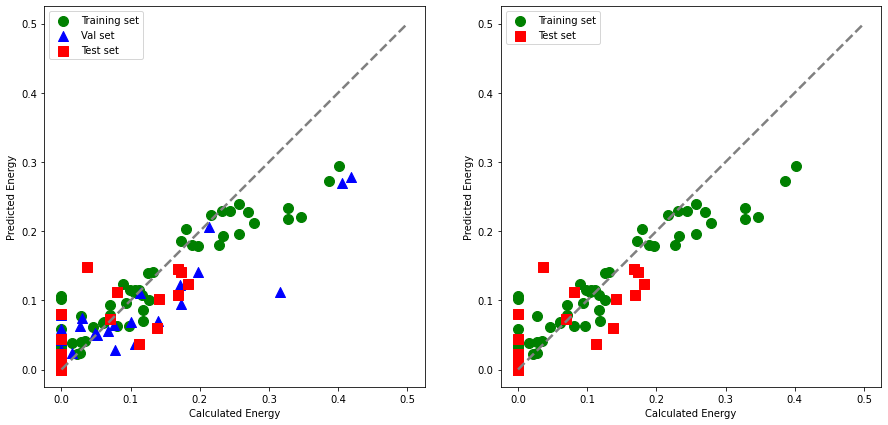

In [51]:
prediction_eg_hp_train_dnn = rf_eg_hp_dnn.predict(X_train_dnn)
prediction_eg_hp_val_dnn = rf_eg_hp_dnn.predict(X_val_dnn)
prediction_eg_hp_test_dnn = rf_eg_hp_dnn.predict(X_test_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_hp_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_hp_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_hp_test_dnn)))
print('\n')

r2_eg_hp_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_hp_train_dnn)
r2_eg_hp_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_hp_val_dnn)
r2_eg_hp_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_hp_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r2_eg_hp_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r2_eg_hp_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r2_eg_hp_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_dnn_eg,prediction_eg_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_hp_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax2.set_ylabel('Predicted Energy')
ax2.legend()
plt.show()

In [52]:
# Export parameters

parameters_eg_hp_RF_dnn = {'max_depth': rf_eg_hp_dnn.max_depth,
                                 'max_features': rf_eg_hp_dnn.max_features,
                                 'min_samples_leaf': rf_eg_hp_dnn.min_samples_leaf,
                                 'min_samples_split': rf_eg_hp_dnn.min_samples_split,
                                 'n_estimators': rf_eg_hp_dnn.n_estimators,
                                 'train_R2': metrics.r2_score(y_train_dnn_eg,prediction_eg_hp_train_dnn),
                                 'val_R2': metrics.r2_score(y_val_dnn_eg,prediction_eg_hp_val_dnn),
                                 'test_R2': metrics.r2_score(y_test_dnn_eg,prediction_eg_hp_test_dnn),
                                 'train_MAE': metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_hp_train_dnn),
                                 'val_MAE': metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_hp_val_dnn),
                                 'test_MAE': metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_hp_test_dnn),
}

parameters_eg_hp_RF_pd_dnn = pd.DataFrame(parameters_eg_hp_RF_dnn,index=[0])
parameters_eg_hp_RF_pd_dnn.to_csv('Results_Eg/parameters_eg_hp_RF_dnn.csv',index=False)

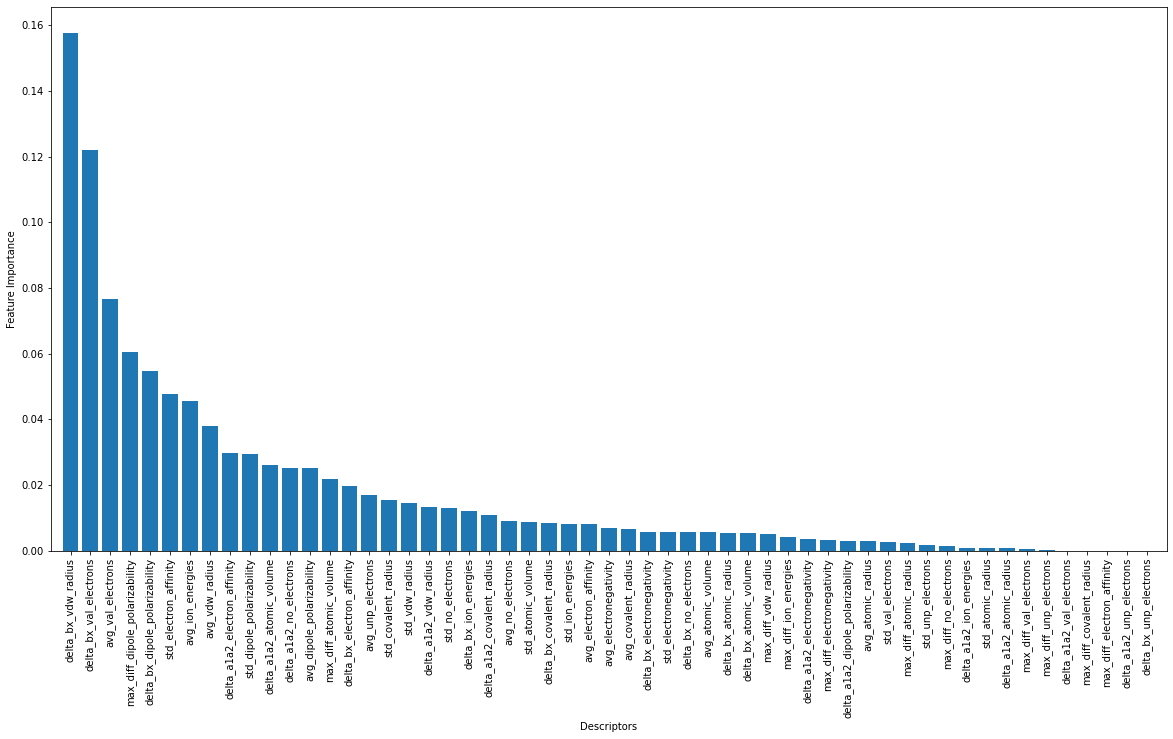

In [53]:
importances_eg_hp_dnn = rf_eg_hp_dnn.feature_importances_
indices_eg_hp_dnn = np.argsort(importances_eg_hp_dnn)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train_dnn.shape[1]), importances_eg_hp_dnn[indices_eg_hp_dnn], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train_dnn.shape[1]), desc_labels[indices_eg_hp_dnn],  rotation=90)
plt.xlim([-1, X_train_dnn.shape[1]])
plt.show()

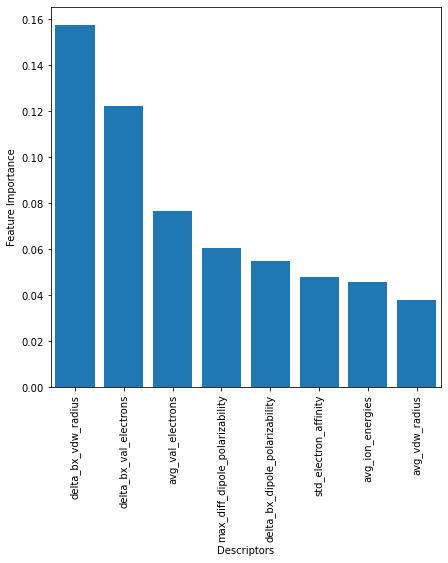

In [54]:
plt.figure(figsize=(7,7))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(8), importances_eg_hp_dnn[indices_eg_hp_dnn][:8], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(8), desc_labels[indices_eg_hp_dnn][:8],  rotation=90)
plt.xlim([-0.5, 7.5])
plt.show()

In [55]:
# Extract the features importance and parity plot

data_feature_imp_hp_RF_dnn = {'feature': desc_labels[indices_eg_hp_dnn],
                   'importance':importances_eg_hp_dnn[indices_eg_hp_dnn]}
pd_feature_imp_hp_RF_dnn = pd.DataFrame(data_feature_imp_hp_RF_dnn)
pd_feature_imp_hp_RF_dnn.to_csv('Results_Eg/feature_importance_eg_RF_hp_dnn.csv',index=False)

prediction_eg_train_pd_hp_dnn = pd.DataFrame(prediction_eg_hp_train_dnn)
prediction_eg_val_pd_hp_dnn = pd.DataFrame(prediction_eg_hp_val_dnn)
prediction_eg_test_pd_hp_dnn = pd.DataFrame(prediction_eg_hp_test_dnn)

prediction_eg_train_pd_hp_dnn.to_csv('Results_Eg/y_pred_train_eg_RF_hp_dnn.csv',index=False)
prediction_eg_val_pd_hp_dnn.to_csv('Results_Eg/y_pred_val_eg_RF_hp_dnn.csv',index=False)
prediction_eg_test_pd_hp_dnn.to_csv('Results_Eg/y_pred_test_eg_RF_hp_dnn.csv',index=False)

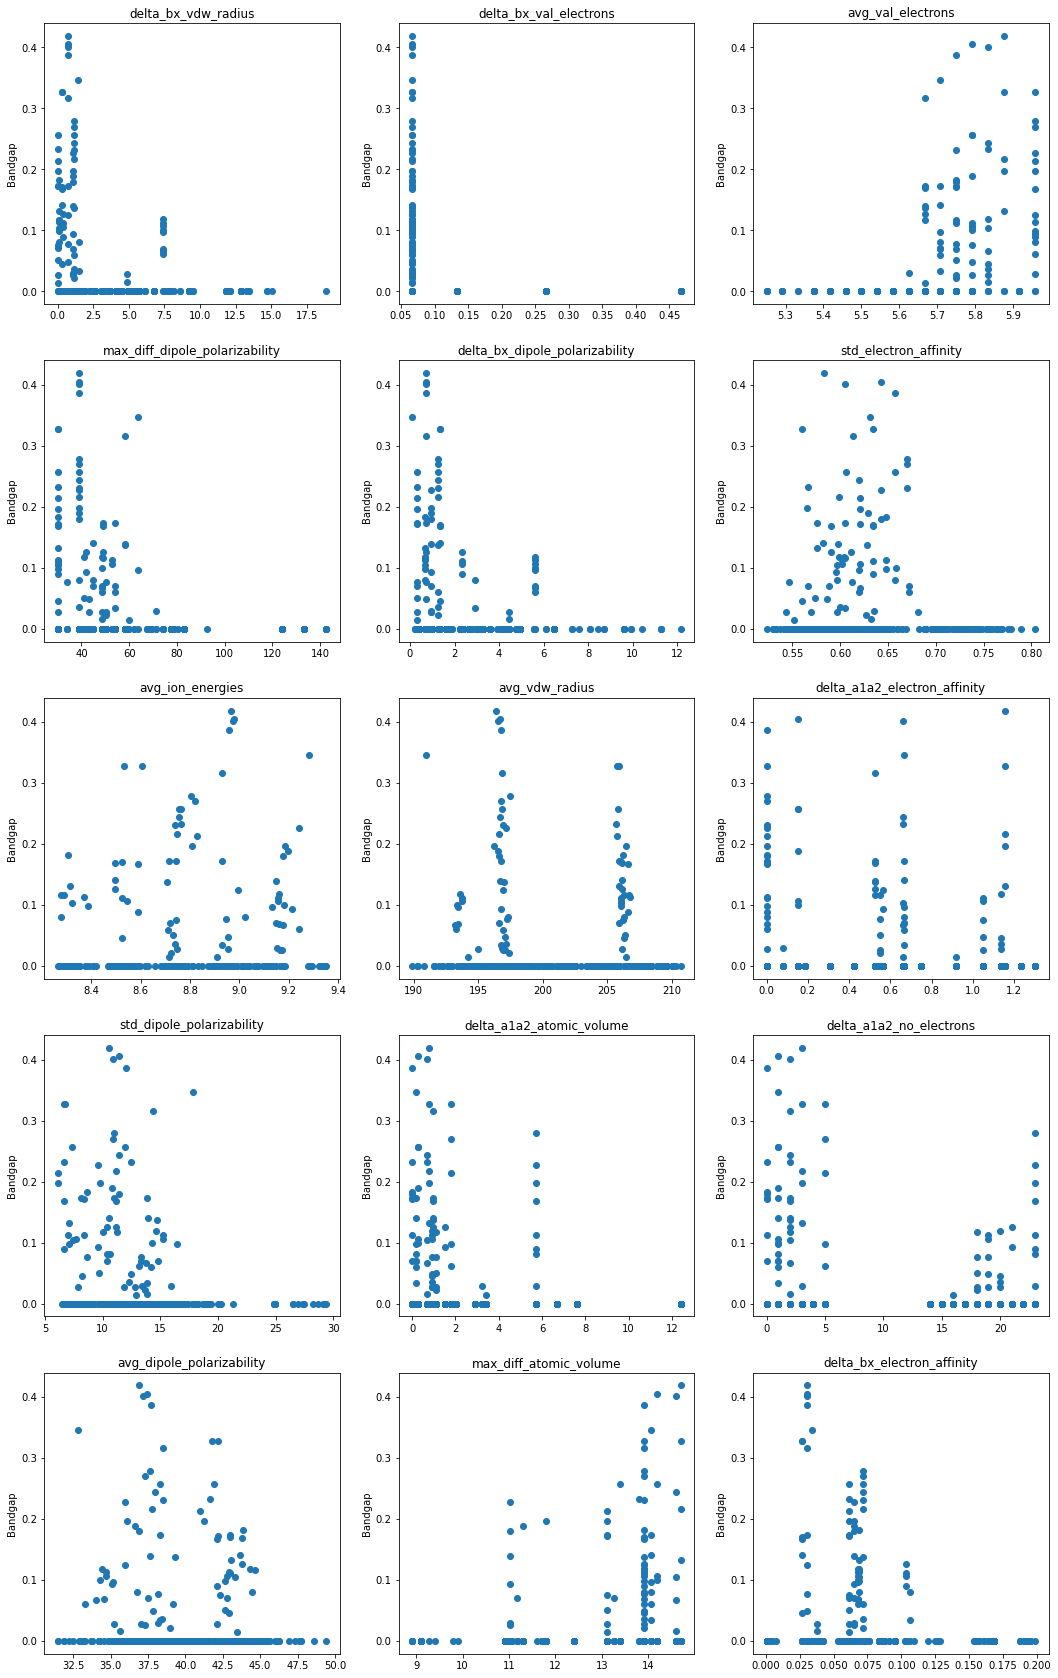

In [56]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (18, 30))

nrows = 5
ncols = 3
count = 0
for i in range(nrows):
    for j in range(ncols):
        
        ax[i,j].scatter(df[desc_labels[indices_eg_hp_dnn][count]],df['bandgap'])
        ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Bandgap'), ax[i,j].set_title(desc_labels[indices_eg_hp_dnn][count])
        
        count = count+1

plt.show()

In [57]:
## Best 8 descriptors

Mean absolute error of training set: 0.012
Mean absolute error of validation set: 0.024
Mean absolute error of test set: 0.015


R^2 score on training data: 0.885
R^2 score on validation data: 0.655
R^2 score on test data: 0.494


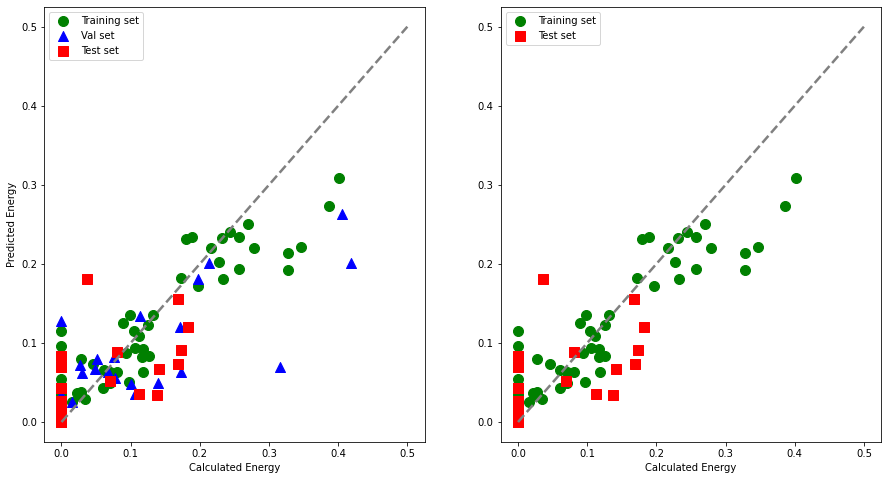

In [58]:
best_features8_hp_dnn = desc_labels[indices_eg_hp_dnn][:8]
best_indices8_hp_dnn = [feature_list.index(i) for i in best_features8_hp_dnn]

X_train_best8_hp_dnn = X_train_dnn[X_train_dnn.columns[best_indices8_hp_dnn]]
X_val_best8_hp_dnn = X_val_dnn[X_val_dnn.columns[best_indices8_hp_dnn]]
X_test_best8_hp_dnn = X_test_dnn[X_test_dnn.columns[best_indices8_hp_dnn]]

rf_eg_best8_hp_dnn = RandomForestRegressor(**grid_search_eg_hp_dnn.best_params_, random_state=41)
rf_eg_best8_hp_dnn.fit(X_train_best8_hp_dnn, y_train_dnn_eg)

prediction_eg_best8_hp_train_dnn = rf_eg_best8_hp_dnn.predict(X_train_best8_hp_dnn)
prediction_eg_best8_hp_val_dnn = rf_eg_best8_hp_dnn.predict(X_val_best8_hp_dnn)
prediction_eg_best8_hp_test_dnn = rf_eg_best8_hp_dnn.predict(X_test_best8_hp_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_best8_hp_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_best8_hp_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_best8_hp_test_dnn)))
print('\n')

r_sq_eg_best8_hp_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_best8_hp_train_dnn)
r_sq_eg_best8_hp_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_best8_hp_val_dnn)
r_sq_eg_best8_hp_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_best8_hp_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best8_hp_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best8_hp_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best8_hp_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,8))
ax1.scatter(y_train_dnn_eg,prediction_eg_best8_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_best8_hp_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_best8_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_best8_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_best8_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [ ]:
## Best 22 features

Mean absolute error of training set: 0.010
Mean absolute error of validation set: 0.019
Mean absolute error of test set: 0.011


R^2 score on training data: 0.912
R^2 score on validation data: 0.816
R^2 score on test data: 0.748


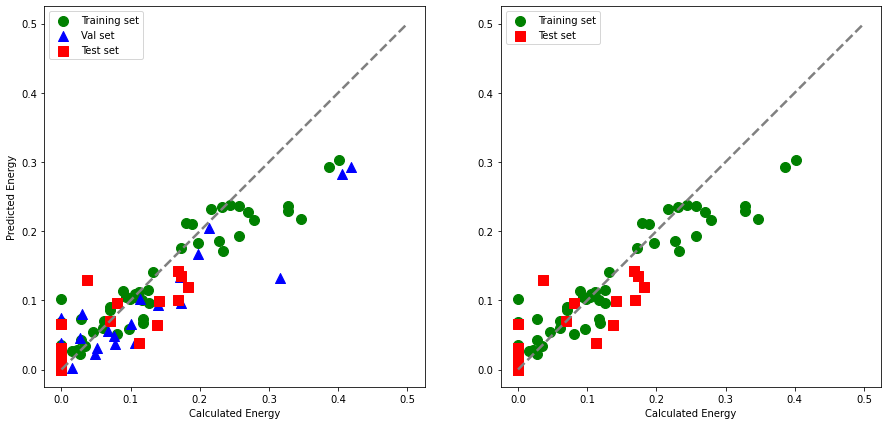

In [60]:
best_features22_hp_dnn = desc_labels[indices_eg_hp_dnn][:22]
best_indices22_hp_dnn = [feature_list.index(i) for i in best_features22_hp_dnn]

X_train_best22_hp_dnn = X_train_dnn[X_train_dnn.columns[best_indices22_hp_dnn]]
X_val_best22_hp_dnn = X_val_dnn[X_val_dnn.columns[best_indices22_hp_dnn]]
X_test_best22_hp_dnn = X_test_dnn[X_test_dnn.columns[best_indices22_hp_dnn]]

rf_eg_best22_hp_dnn = RandomForestRegressor(**grid_search_eg_hp_dnn.best_params_, random_state=41)
rf_eg_best22_hp_dnn.fit(X_train_best22_hp_dnn, y_train_dnn_eg)

prediction_eg_best22_hp_train_dnn = rf_eg_best22_hp_dnn.predict(X_train_best22_hp_dnn)
prediction_eg_best22_hp_val_dnn = rf_eg_best22_hp_dnn.predict(X_val_best22_hp_dnn)
prediction_eg_best22_hp_test_dnn = rf_eg_best22_hp_dnn.predict(X_test_best22_hp_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_best22_hp_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_best22_hp_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_best22_hp_test_dnn)))
print('\n')

r_sq_eg_best22_hp_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_best22_hp_train_dnn)
r_sq_eg_best22_hp_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_best22_hp_val_dnn)
r_sq_eg_best22_hp_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_best22_hp_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best22_hp_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best22_hp_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best22_hp_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
ax1.scatter(y_train_dnn_eg,prediction_eg_best22_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_best22_hp_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_best22_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_best22_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_best22_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [61]:
## Best 45 features

Mean absolute error of training set: 0.010
Mean absolute error of validation set: 0.019
Mean absolute error of test set: 0.011


R^2 score on training data: 0.914
R^2 score on validation data: 0.804
R^2 score on test data: 0.730


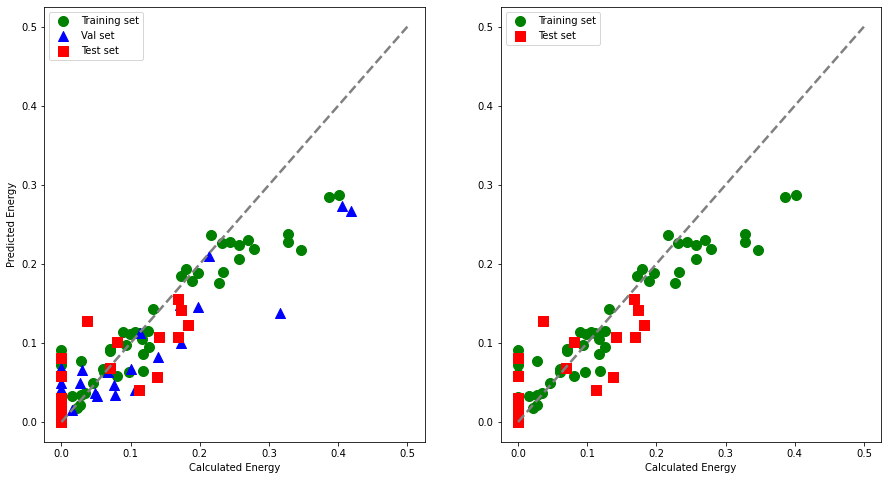

In [62]:
best_features45_hp_dnn = desc_labels[indices_eg_hp_dnn][:45]
best_indices45_hp_dnn = [feature_list.index(i) for i in best_features45_hp_dnn]

X_train_best45_hp_dnn = X_train_dnn[X_train_dnn.columns[best_indices45_hp_dnn]]
X_val_best45_hp_dnn = X_val_dnn[X_val_dnn.columns[best_indices45_hp_dnn]]
X_test_best45_hp_dnn = X_test_dnn[X_test_dnn.columns[best_indices45_hp_dnn]]

rf_eg_best45_hp_dnn = RandomForestRegressor(**grid_search_eg_hp_dnn.best_params_, random_state=41)
rf_eg_best45_hp_dnn.fit(X_train_best45_hp_dnn, y_train_dnn_eg)

prediction_eg_best45_hp_train_dnn = rf_eg_best45_hp_dnn.predict(X_train_best45_hp_dnn)
prediction_eg_best45_hp_val_dnn = rf_eg_best45_hp_dnn.predict(X_val_best45_hp_dnn)
prediction_eg_best45_hp_test_dnn = rf_eg_best45_hp_dnn.predict(X_test_best45_hp_dnn)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_dnn_eg,prediction_eg_best45_hp_train_dnn)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_dnn_eg,prediction_eg_best45_hp_val_dnn)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_dnn_eg,prediction_eg_best45_hp_test_dnn)))
print('\n')

r_sq_eg_best45_hp_train_dnn = metrics.r2_score(y_train_dnn_eg,prediction_eg_best45_hp_train_dnn)
r_sq_eg_best45_hp_val_dnn = metrics.r2_score(y_val_dnn_eg,prediction_eg_best45_hp_val_dnn)
r_sq_eg_best45_hp_test_dnn = metrics.r2_score(y_test_dnn_eg,prediction_eg_best45_hp_test_dnn)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best45_hp_train_dnn))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best45_hp_val_dnn))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best45_hp_test_dnn))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,8))
ax1.scatter(y_train_dnn_eg,prediction_eg_best45_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_dnn_eg,prediction_eg_best45_hp_val_dnn ,color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_dnn_eg,prediction_eg_best45_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_dnn_eg,prediction_eg_best45_hp_train_dnn ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_dnn_eg,prediction_eg_best45_hp_test_dnn, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [6]:
## predicting the gap for 785 candidates using the best model (hp with 22 features)

In [4]:
X_train = pd.read_csv('Results_Eg/X_train_ffnn.csv')
X_val = pd.read_csv('Results_Eg/X_val_ffnn.csv')
X_test = pd.read_csv('Results_Eg/X_test_ffnn.csv')

y_train = pd.read_csv('Results_Eg/y_train_ffnn.csv')
y_val = pd.read_csv('Results_Eg/y_val_ffnn.csv')
y_test = pd.read_csv('Results_Eg/y_test_ffnn.csv')

y_train_eg = y_train['57']
y_val_eg = y_val['57']
y_test_eg = y_test['57']

In [7]:
X_train.columns = df.iloc[:,26:].columns
X_val.columns = df.iloc[:,26:].columns
X_test.columns = df.iloc[:,26:].columns

In [8]:
candidates_785 = pd.read_excel('Results_Eg/descriptors_for_891_candidates.xlsx','without_Si')

In [9]:
best_22_features = ['delta_bx_vdw_radius', 'delta_bx_val_electrons', 'avg_val_electrons', 'max_diff_dipole_polarizability','delta_bx_dipole_polarizability',
'std_electron_affinity','avg_ion_energies','avg_vdw_radius','delta_a1a2_electron_affinity','std_dipole_polarizability','delta_a1a2_atomic_volume',
'delta_a1a2_no_electrons','avg_dipole_polarizability','max_diff_atomic_volume','delta_bx_electron_affinity','avg_unp_electrons','std_covalent_radius',
'std_vdw_radius','delta_a1a2_vdw_radius','std_no_electrons','delta_bx_ion_energies','delta_a1a2_covalent_radius']

In [30]:
best_22_features_785 = ['delta_bx1418bx58914_avg_vdw_radius', 'delta_bx1418bx58914_avg_val_electrons', 'avg_val_electrons', 'max_diff_dipole_polarizability','delta_bx1418bx58914_avg_dipole_polarizability',
'std_electron_affinity','avg_ion_energies','avg_vdw_radius','delta_a1a2_electron_affinity','std_dipole_polarizability','delta_a1a2_atomic_volume',
'delta_a1a2_no_electrons','avg_dipole_polarizability','max_diff_atomic_volume','delta_bx1418bx58914_avg_electron_affinity','avg_unp_electrons','std_covalent_radius',
'std_vdw_radius','delta_a1a2_vdw_radius','std_no_electrons','delta_bx1418bx58914_avg_ion_energies','delta_a1a2_covalent_radius']

Mean absolute error of training set: 0.010
Mean absolute error of validation set: 0.019
Mean absolute error of test set: 0.011


R^2 score on training data: 0.912
R^2 score on validation data: 0.816
R^2 score on test data: 0.748


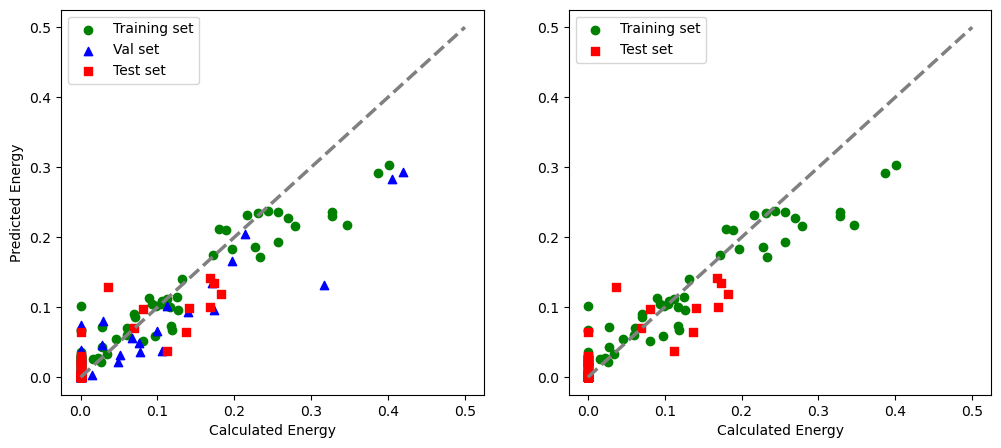

In [11]:
X_train_best_22 = X_train[best_22_features]
X_val_best_22 = X_val[best_22_features]
X_test_best_22 = X_test[best_22_features]

rf_eg_best_22 = RandomForestRegressor(max_depth=10, max_features=40, min_samples_leaf=1, min_samples_split=6, n_estimators=50, random_state=41)
rf_eg_best_22.fit(X_train_best_22, y_train_eg)

prediction_eg_best22_hp_train = rf_eg_best_22.predict(X_train_best_22)
prediction_eg_best22_hp_val = rf_eg_best_22.predict(X_val_best_22)
prediction_eg_best22_hp_test = rf_eg_best_22.predict(X_test_best_22)

pd.DataFrame(prediction_eg_best22_hp_train).to_csv('Results_Eg/y_pred_train_eg_RF_hp_22.csv',index=False)
pd.DataFrame(prediction_eg_best22_hp_val).to_csv('Results_Eg/y_pred_val_eg_RF_hp_22.csv',index=False)
pd.DataFrame(prediction_eg_best22_hp_test).to_csv('Results_Eg/y_pred_test_eg_RF_hp_22.csv',index=False)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_best22_hp_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_best22_hp_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_best22_hp_test)))
print('\n')

r_sq_eg_best22_hp_train = metrics.r2_score(y_train_eg,prediction_eg_best22_hp_train)
r_sq_eg_best22_hp_val = metrics.r2_score(y_val_eg,prediction_eg_best22_hp_val)
r_sq_eg_best22_hp_test = metrics.r2_score(y_test_eg,prediction_eg_best22_hp_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_best22_hp_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_best22_hp_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_best22_hp_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.scatter(y_train_eg,prediction_eg_best22_hp_train ,color = 'g', marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_best22_hp_val ,color = 'b', marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_best22_hp_test, color = 'r', marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax1.legend()

ax2.scatter(y_train_eg,prediction_eg_best22_hp_train ,color = 'g', marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_best22_hp_test, color = 'r', marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
ax2.legend()

plt.show()

In [32]:
X_785 = candidates_785[best_22_features_785]

In [40]:
X_785_renamed = X_785.rename(columns = {'delta_bx1418bx58914_avg_vdw_radius': 'delta_bx_vdw_radius',
                        'delta_bx1418bx58914_avg_val_electrons': 'delta_bx_val_electrons',
                        'delta_bx1418bx58914_avg_dipole_polarizability': 'delta_bx_dipole_polarizability',
                        'delta_bx1418bx58914_avg_electron_affinity': 'delta_bx_electron_affinity',
                        'delta_bx1418bx58914_avg_ion_energies': 'delta_bx_ion_energies'})

In [43]:
pred_y_785 = rf_eg_best_22.predict(X_785_renamed)
pd.DataFrame(pred_y_785).to_csv('Results_Eg/best_RF_Eg_pred_785.csv',index=False)